In [3]:
import pandas as pd
# abrimos el archivo usando una función específica de pandas
raw_dataset = pd.read_csv("winequality_BE.csv", delimiter = ';')

Examinamos que variables y de que tipo tenemos:

In [4]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  3232 non-null   object 
 1   fixed acidity         3232 non-null   float64
 2   volatile acidity      3232 non-null   float64
 3   citric acid           3232 non-null   float64
 4   residual sugar        3232 non-null   float64
 5   chlorides             3232 non-null   float64
 6   free sulfur dioxide   3232 non-null   float64
 7   total sulfur dioxide  3232 non-null   float64
 8   density               3232 non-null   float64
 9   pH                    3232 non-null   float64
 10  sulphates             3232 non-null   float64
 11  alcohol               3232 non-null   object 
 12  quality               3232 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 328.4+ KB


In [5]:
raw_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,7.659762,0.398776,0.302051,4.625511,0.066318,25.968131,94.803682,2.047836,3.253153,0.574449,5.728651
std,1.509350,0.193020,0.160235,4.387036,0.042074,17.333965,61.488085,9.124916,0.164035,0.166100,0.854472
min,4.200000,0.100000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987130,2.720000,0.220000,3.000000
25%,6.700000,0.250000,0.220000,1.900000,0.042000,12.000000,38.000000,0.993780,3.140000,0.460000,5.000000
50%,7.300000,0.350000,0.300000,2.500000,0.059000,23.000000,92.000000,0.995900,3.240000,0.550000,6.000000
75%,8.200000,0.530000,0.390000,6.400000,0.080000,36.000000,142.000000,0.997430,3.360000,0.650000,6.000000
max,15.900000,1.580000,1.230000,65.800000,0.611000,146.500000,344.000000,103.898000,4.010000,2.000000,8.000000


In [6]:
dataset_modificado = raw_dataset.copy()

LIMPIEZA DE DATOS

Convertimos los valores de alchol de object a float

In [7]:

dataset_modificado['alcohol'] = dataset_modificado['alcohol'].apply(lambda x: x.replace('.', ',', 1))
dataset_modificado['alcohol'] = dataset_modificado['alcohol'].str.replace('.', '')
dataset_modificado['alcohol'] = dataset_modificado['alcohol'].str.replace(',', '.')
dataset_modificado['alcohol'] = dataset_modificado['alcohol'].astype(float)

# convierte alchol a de object a float

In [8]:
dataset_modificado["alcohol"].value_counts().sort_index(ascending=False)

alcohol
956.666667     1
923.333333     1
135.666667     1
110.666667     1
100.333333     2
              ..
8.700000      25
8.600000       7
8.500000       2
8.400000       2
8.000000       2
Name: count, Length: 69, dtype: int64

Cambiamos los valores fuera de rango, ya que evaluamos que pueden ser valores reales ingresados de forma incorrecta:
956.666667     = 9,56
923.333333     = 9,23
135.666667     = 13,56
110.666667     = 11,6
100.333333     = 10,3

In [9]:
dataset_modificado["alcohol"] = dataset_modificado["alcohol"].astype("double")

In [10]:
import numpy as np

# Usar numpy.isclose para comparar con tolerancia
dataset_modificado.loc[np.isclose(dataset_modificado['alcohol'], 956.666667), 'alcohol'] = 9.56
dataset_modificado.loc[np.isclose(dataset_modificado['alcohol'], 923.333333), 'alcohol'] = 9.23
dataset_modificado.loc[np.isclose(dataset_modificado['alcohol'], 135.666667), 'alcohol'] = 13.56
dataset_modificado.loc[np.isclose(dataset_modificado['alcohol'], 110.666667), 'alcohol'] = 11.6
dataset_modificado.loc[np.isclose(dataset_modificado['alcohol'], 100.333333), 'alcohol'] = 10.3

dataset_modificado["alcohol"].value_counts().sort_index(ascending=False)

alcohol
14.90     1
14.00     9
13.70     2
13.60     4
13.56     1
         ..
8.70     25
8.60      7
8.50      2
8.40      2
8.00      2
Name: count, Length: 67, dtype: int64

ELIMINAMOS REPETIDOS


In [11]:
# imprimimos las filas duplicadas
dataset_modificado[dataset_modificado.duplicated(keep=False)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,Viogner,7.8,0.490,0.49,7.00,0.043,29.0,149.0,0.99520,3.21,0.33,10.0,5
7,Viogner,7.8,0.490,0.49,7.00,0.043,29.0,149.0,0.99520,3.21,0.33,10.0,5
8,Viogner,6.4,0.220,0.49,7.50,0.054,42.0,151.0,0.99480,3.27,0.52,10.1,6
9,Viogner,7.3,0.190,0.49,15.55,0.058,50.0,134.0,0.99980,3.42,0.36,9.1,7
11,Viogner,7.3,0.190,0.49,15.55,0.058,50.0,134.0,0.99980,3.42,0.36,9.1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3200,Merlot,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
3212,Merlot,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
3214,Merlot,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
3225,Merlot,6.3,0.510,0.13,2.30,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [12]:
# eliminamos los duplicados
dataset_modificado.drop_duplicates(keep="first", inplace=True)
# contamos la cantidad de duplicados
dataset_modificado.duplicated().sum()

np.int64(0)

In [13]:
conteo = dataset_modificado[dataset_modificado['density'] > 1]['density'].count()

print(conteo)

84


In [14]:
dataset_modificado["density"].value_counts().sort_index(ascending=False)

density
103.89800    1
100.36900    1
100.31500    2
100.28900    1
100.24200    1
            ..
0.98870      1
0.98865      1
0.98836      1
0.98802      1
0.98713      1
Name: count, Length: 772, dtype: int64

Eliminamos valores incoherentes de densidad en el dataset, borrando las filas.

In [15]:
condicion = dataset_modificado['density'] <= 1 # LOS VALORES CON LOS QUE TE QUERES QUEDAR  
df_filtrado = dataset_modificado[condicion]
df_filtrado["density"].value_counts().sort_index(ascending=False)

density
1.00000    15
0.99990     2
0.99980    12
0.99976     4
0.99975     1
           ..
0.98870     1
0.98865     1
0.98836     1
0.98802     1
0.98713     1
Name: count, Length: 734, dtype: int64

Paso las columas de dioxido de sulfuro total y libre a gramos por litro para que quede en la misma escala que las demas variables. Tambien la de densidad de gramos por centimetro cubico a gramos por litro

In [16]:
df_filtrado['total sulfur dioxide'] = df_filtrado['total sulfur dioxide'] / 1000
df_filtrado['free sulfur dioxide'] = df_filtrado['free sulfur dioxide'] / 1000
df_filtrado['density'] = df_filtrado['density'] * 1000

C:\Users\Tomas\AppData\Local\Temp\ipykernel_5624\1239511171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['total sulfur dioxide'] = df_filtrado['total sulfur dioxide'] / 1000
C:\Users\Tomas\AppData\Local\Temp\ipykernel_5624\1239511171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['free sulfur dioxide'] = df_filtrado['free sulfur dioxide'] / 1000
C:\Users\Tomas\AppData\Local\Temp\ipykernel_5624\1239511171.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

Finalmente así queda el dataset filtrado:

In [17]:
df_filtrado

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Viogner,7.4,0.190,0.49,6.7,0.037,0.015,0.110,993.80,3.20,0.38,11.0,7
2,Viogner,7.5,0.140,0.74,1.6,0.035,0.021,0.126,993.30,3.26,0.45,10.2,6
3,Viogner,7.8,0.490,0.49,7.0,0.043,0.029,0.149,995.20,3.21,0.33,10.0,5
4,Viogner,8.1,0.120,0.49,1.2,0.042,0.043,0.160,993.40,3.13,0.48,9.7,6
5,Viogner,7.6,0.470,0.49,13.0,0.239,0.042,0.220,998.80,2.96,0.51,9.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,Merlot,6.8,0.620,0.08,1.9,0.068,0.028,0.038,996.51,3.42,0.82,9.5,6
3227,Merlot,6.2,0.600,0.08,2.0,0.090,0.032,0.044,994.90,3.45,0.58,10.5,5
3228,Merlot,5.9,0.550,0.10,2.2,0.062,0.039,0.051,995.12,3.52,0.76,11.2,6
3230,Merlot,5.9,0.645,0.12,2.0,0.075,0.032,0.044,995.47,3.57,0.71,10.2,5


Termina limpieza, arrancamos EDA:

Creamos un profilling del dataset para empezar a observar relaciolos datos y armar hipotesis:

In [18]:
import webbrowser
import pandas_profiling as pp
from pathlib import Path

nombre_archivo = "vinos"

# Generamos el reporte
report = pp.ProfileReport(df_filtrado)

# Lo mostramos interactivo en nuestra notebook
if not Path(f"{nombre_archivo}.html").exists():
    report.to_file(output_file=(f"{nombre_archivo}.html"))
else:
    print("ya está creado, relaja que ahí te lo abro")

# Abrir el archivo HTML
webbrowser.open(f'{nombre_archivo}.html')



C:\Users\Tomas\AppData\Local\Temp\ipykernel_5624\2293799307.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


ya está creado, relaja que ahí te lo abro


True

Visualizamos como se distribuyen las variables del conjunto de datos:

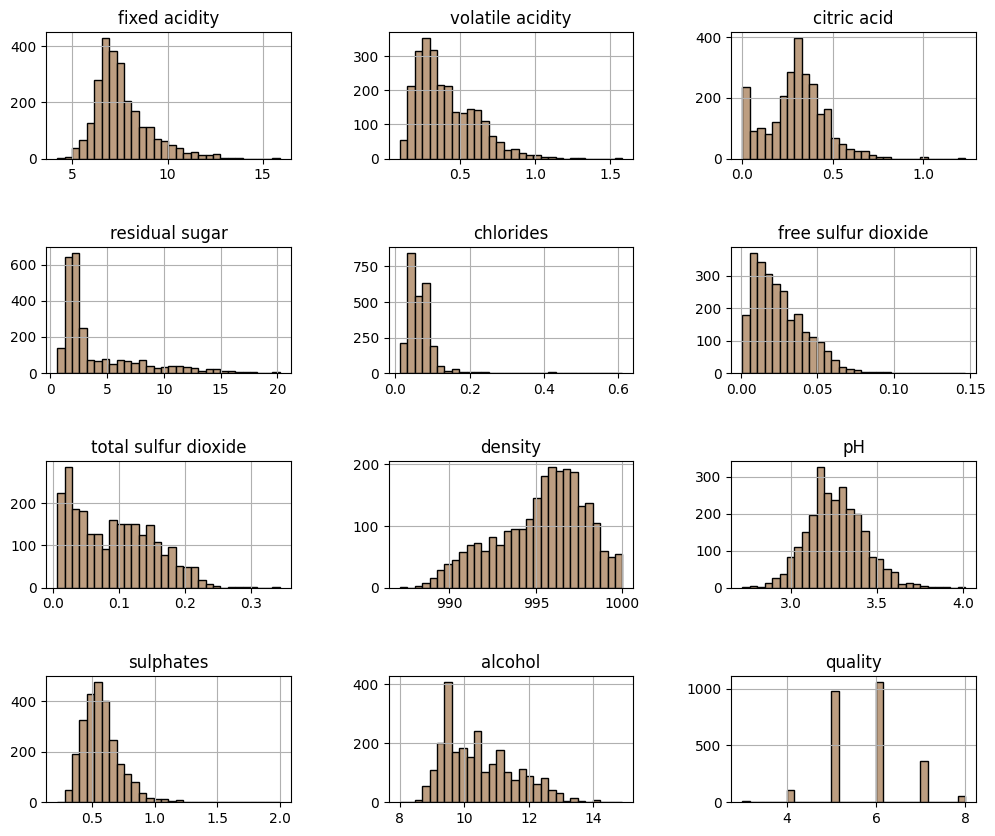

In [20]:
%matplotlib inline
import matplotlib

import matplotlib.pyplot as plt
# construimos una serie de histogramas mostrando la distribución de las features
df_filtrado.hist(figsize=(12, 10), bins=30, edgecolor="black", color= "#bd9e81")
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

No hay normalidad en ninguna variable casi, el pH pareciera ser la unica variable normal.

Una vez hecho el análisis anterior pasamos a descubrir relaciones entre las variables:

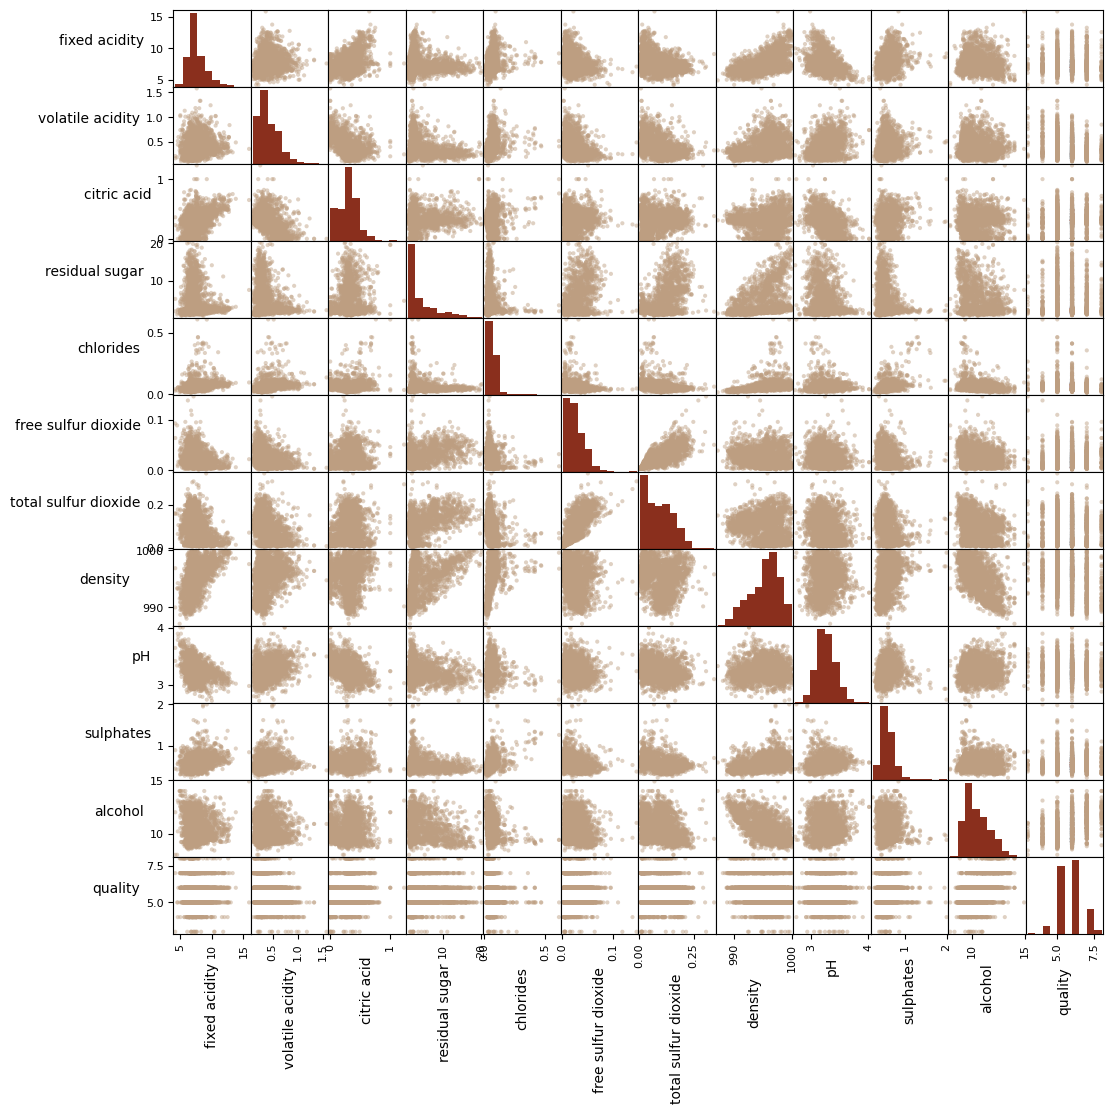

In [21]:
# Seleccionar las columnas numéricas
numeric_cols = df_filtrado.select_dtypes(include=['number'])

# Crear el scatter matrix
axs = pd.plotting.scatter_matrix(numeric_cols, figsize=(12, 12), alpha=0.47, hist_kwds={'color':'#8a2f1d'}, color="#bd9e81")
# la mostramos por pantalla
# acomodamos la orientación del contenido de los ejes
for i in range(len(numeric_cols.columns)):
  for j in range(len(numeric_cols.columns)):
    ax=axs[i,j]
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.show()

Observamos que hay varias variables que aprecieran tener alguna relacion, nos fijamos cuales son las mas correlacionadas y graficamos sus diagramas de dispersión:

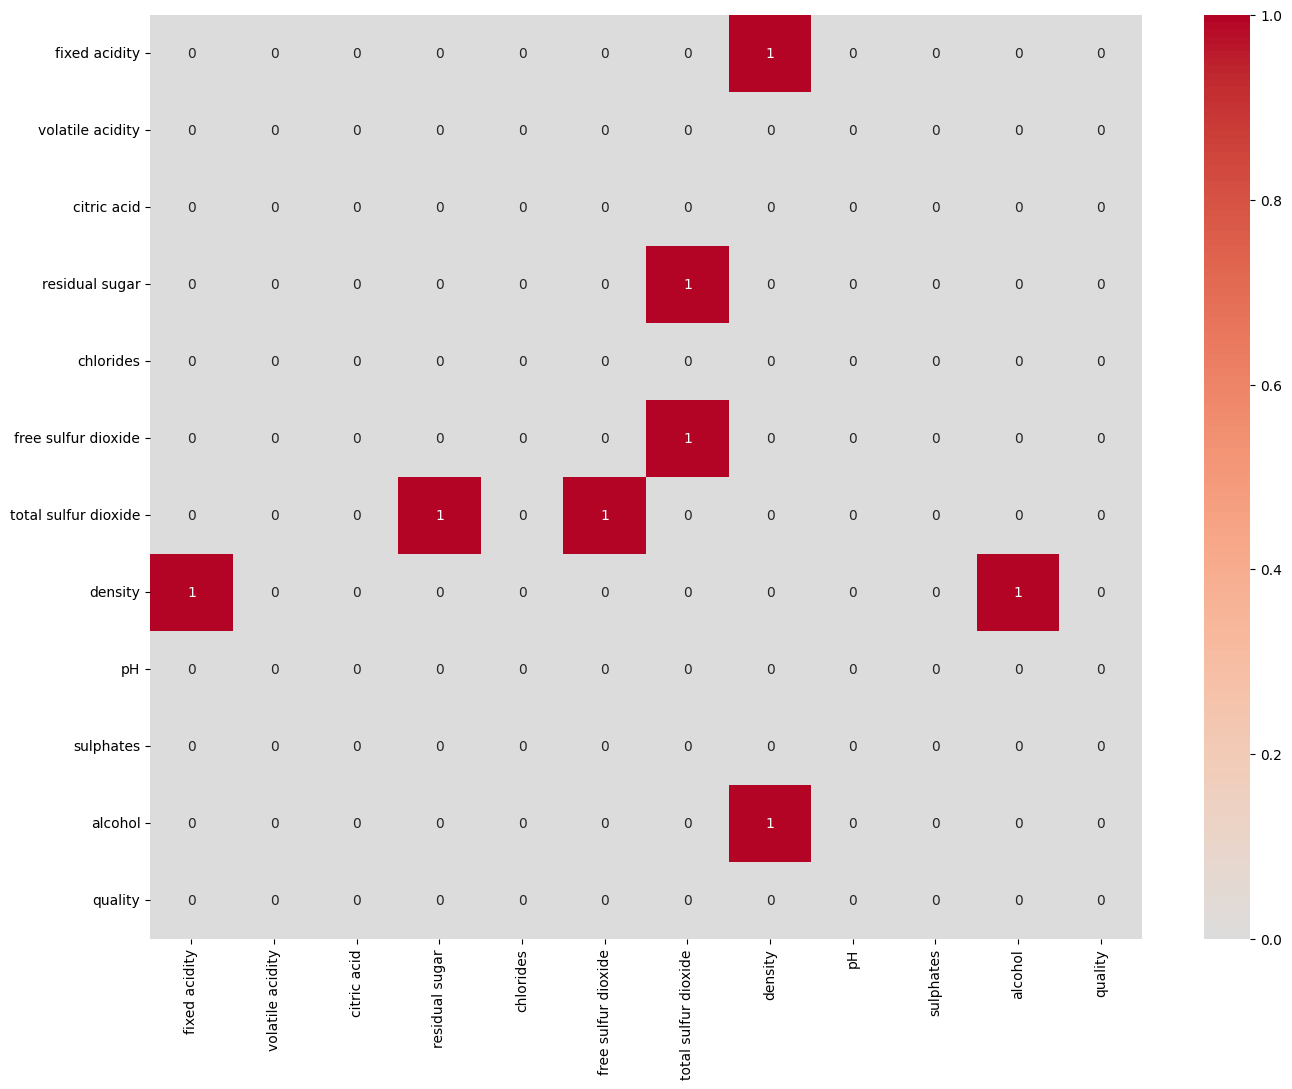

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_sin_strings = df_filtrado.copy()
df_sin_strings = df_sin_strings.drop(columns=['type'])
correlation_matrix = df_sin_strings.corr()

# tomamos el valor absoluto de las correlaciones, umbralamos las mayores a 0.5
correlation_matrix_umbralizada = correlation_matrix.abs() > 0.5
# aprovechamos y sacamos la diagonal
np.fill_diagonal(correlation_matrix_umbralizada.values, 0)

# e imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12));
sns.heatmap(correlation_matrix_umbralizada, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

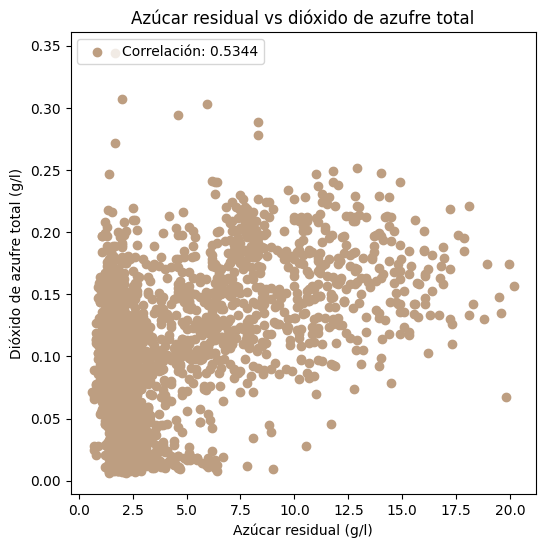

In [23]:
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

datos_columna1 = df_filtrado["residual sugar"]
datos_columna2 = df_filtrado["total sulfur dioxide"]
coeficiente_correlacion = np.corrcoef(datos_columna1, datos_columna2)[0, 1]

plt.scatter(datos_columna1, datos_columna2, c="#bd9e81")

# Añadir etiquetas y título
plt.xlabel("Azúcar residual (g/l)")
plt.ylabel("Dióxido de azufre total (g/l)")
plt.title("Azúcar residual vs dióxido de azufre total")
plt.legend([f"Correlación: {coeficiente_correlacion:.4f}"], loc="upper left")

# Mostrar el gráfico
plt.show()



No parece haber una relacion clara aunque el coeficiente de correlacion sea alto.

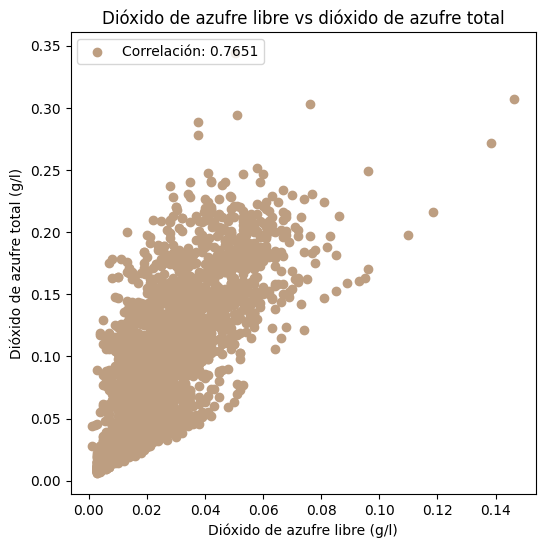

In [24]:
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

datos_columna1 = df_filtrado["free sulfur dioxide"]
datos_columna2 = df_filtrado["total sulfur dioxide"]
coeficiente_correlacion = np.corrcoef(datos_columna1, datos_columna2)[0, 1]

plt.scatter(datos_columna1, datos_columna2, c="#bd9e81")

# Añadir etiquetas y título
plt.xlabel("Dióxido de azufre libre (g/l)")
plt.ylabel("Dióxido de azufre total (g/l)")
plt.title("Dióxido de azufre libre vs dióxido de azufre total")
plt.legend([f"Correlación: {coeficiente_correlacion:.4f}"], loc="upper left")

# Mostrar el gráfico
plt.show()



Acá si que hay una relacion evidente, se puede ver claramente como ambas variables ascienden de forma conjunta, queda bien explicado el coeficiente en el diagrama. Aunque la relación es bastante evidente ya que ambas variables explican un mismo quimico que es el dioxido de azufre.

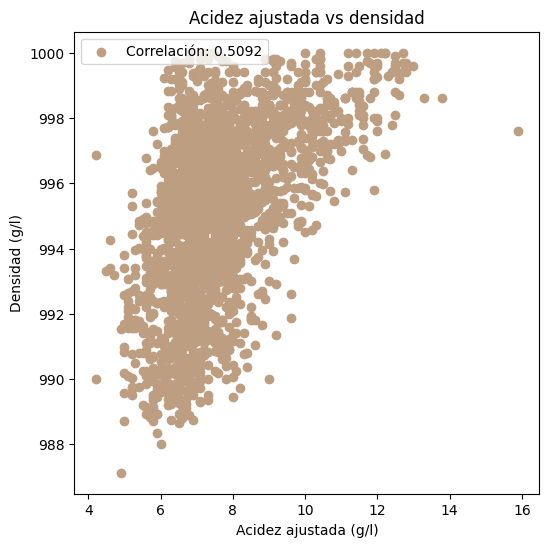

In [25]:
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

datos_columna1 = df_filtrado["fixed acidity"]
datos_columna2 = df_filtrado["density"]
coeficiente_correlacion = np.corrcoef(datos_columna1, datos_columna2)[0, 1]

plt.scatter(datos_columna1, datos_columna2, color="#bd9e81")

# Añadir etiquetas y título
plt.xlabel("Acidez ajustada (g/l)")
plt.ylabel("Densidad (g/l)")
plt.title("Acidez ajustada vs densidad")
plt.legend([f"Correlación: {coeficiente_correlacion:.4f}"], loc="upper left")

# Mostrar el gráfico
plt.show()



En este gráfico se puede llegar a apreciar una relacion entre la acidez ajustada y la densidad aunque el coeficiente de correlacion no sea muy alto.

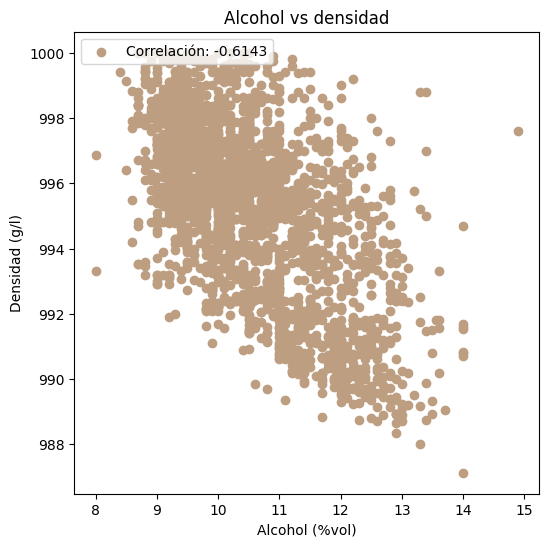

In [26]:
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

datos_columna1 = df_filtrado["alcohol"]
datos_columna2 = df_filtrado["density"]
coeficiente_correlacion = np.corrcoef(datos_columna1, datos_columna2)[0, 1]

plt.scatter(datos_columna1, datos_columna2, color="#bd9e81")

# Añadir etiquetas y título
plt.xlabel("Alcohol (%vol)")
plt.ylabel("Densidad (g/l)")
plt.title("Alcohol vs densidad")
plt.legend([f"Correlación: {coeficiente_correlacion:.4f}"], loc="upper left")

# Mostrar el gráfico
plt.show()



Clara relacion lineal inversa entre las variables, esto puede llegar a explicar las diferencias entre las calidades de los vinos o entre los tipos de uva.

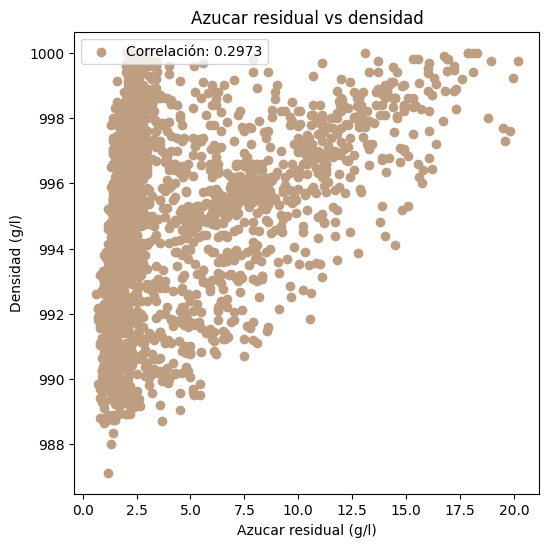

In [27]:
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

datos_columna1 = df_filtrado["residual sugar"]
datos_columna2 = df_filtrado["density"]
coeficiente_correlacion = np.corrcoef(datos_columna1, datos_columna2)[0, 1]

plt.scatter(datos_columna1, datos_columna2, color="#bd9e81")

# Añadir etiquetas y título
plt.xlabel("Azucar residual (g/l)")
plt.ylabel("Densidad (g/l)")
plt.title("Azucar residual vs densidad")
plt.legend([f"Correlación: {coeficiente_correlacion:.4f}"], loc="upper left")

# Mostrar el gráfico
plt.show()



Esta relacion no tiene sentido ser analizada. No se puede ver una recta que se acerque bien a todos los puntos.

Una vez halladas algunas relaciones, pasamos a usar métodos gráficos para analizar cada una de ellas más a detalle:

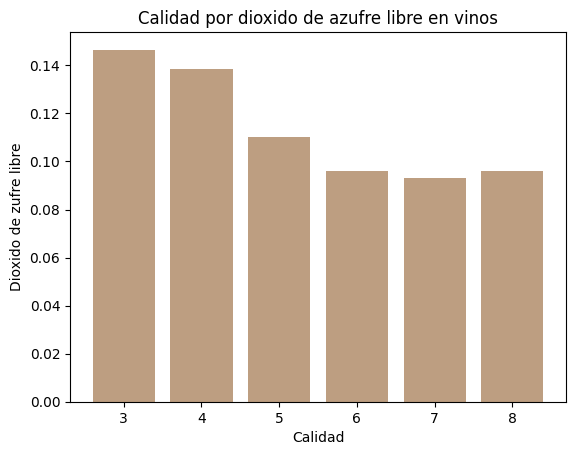

In [180]:
plt.bar(df_filtrado["quality"], df_filtrado["free sulfur dioxide"], color= "#bd9e81")

# Agregar etiquetas a los ejes
plt.xlabel("Calidad")
plt.ylabel("Dioxido de zufre libre")

# Agregar un título al gráfico
plt.title("Calidad por dioxido de azufre libre en vinos")
#plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor visualización
0
# Mostrar el gráfico
plt.show()

Observamos como la cantidad de dioxido de azufre decrementa a medida que aumenta la calidad de los vinos, esto puede deberse a que el dioxido de azufre provoca algun tipo de mal sabor en boca. 

Dividimos el dataset para analizar los vinos de mayor calidad:

In [29]:
condicion = dataset_modificado['quality'] == 8 # LOS VALORES CON LOS QUE TE QUERES QUEDAR  
df_max_calidad = dataset_modificado[condicion]
df_max_calidad.head(10)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
32,Viogner,6.5,0.13,0.37,1.00,0.036,48.0,114.0,0.99110,3.41,0.51,11.5,8
82,Viogner,6.5,0.18,0.34,1.60,0.040,43.0,148.0,0.99120,3.32,0.59,11.5,8
145,Viogner,6.4,0.15,0.36,1.80,0.034,43.0,150.0,0.99220,3.42,0.69,11.0,8
164,Viogner,6.9,0.25,0.27,9.05,0.039,37.0,128.0,0.99360,3.27,0.34,11.3,8
347,Viogner,7.6,0.20,0.30,14.20,0.056,53.0,212.5,0.99900,3.14,0.46,8.9,8
665,Viogner,6.3,0.41,0.18,3.50,0.027,23.0,109.0,0.99018,3.34,0.54,12.8,8
700,Viogner,6.8,0.37,0.28,1.90,0.024,64.0,106.0,0.98993,3.45,0.60,12.6,8
709,Viogner,7.7,0.40,0.27,4.50,0.034,27.0,95.0,0.99175,3.21,0.59,12.3,8
749,Viogner,6.9,0.15,0.28,4.40,0.029,14.0,107.0,0.99347,3.24,0.46,10.4,8
756,Viogner,6.8,0.46,0.26,2.70,0.042,28.0,83.0,0.99114,3.38,0.51,12.0,8


Buscamos que tienen en común los vinos mejor puntuados:

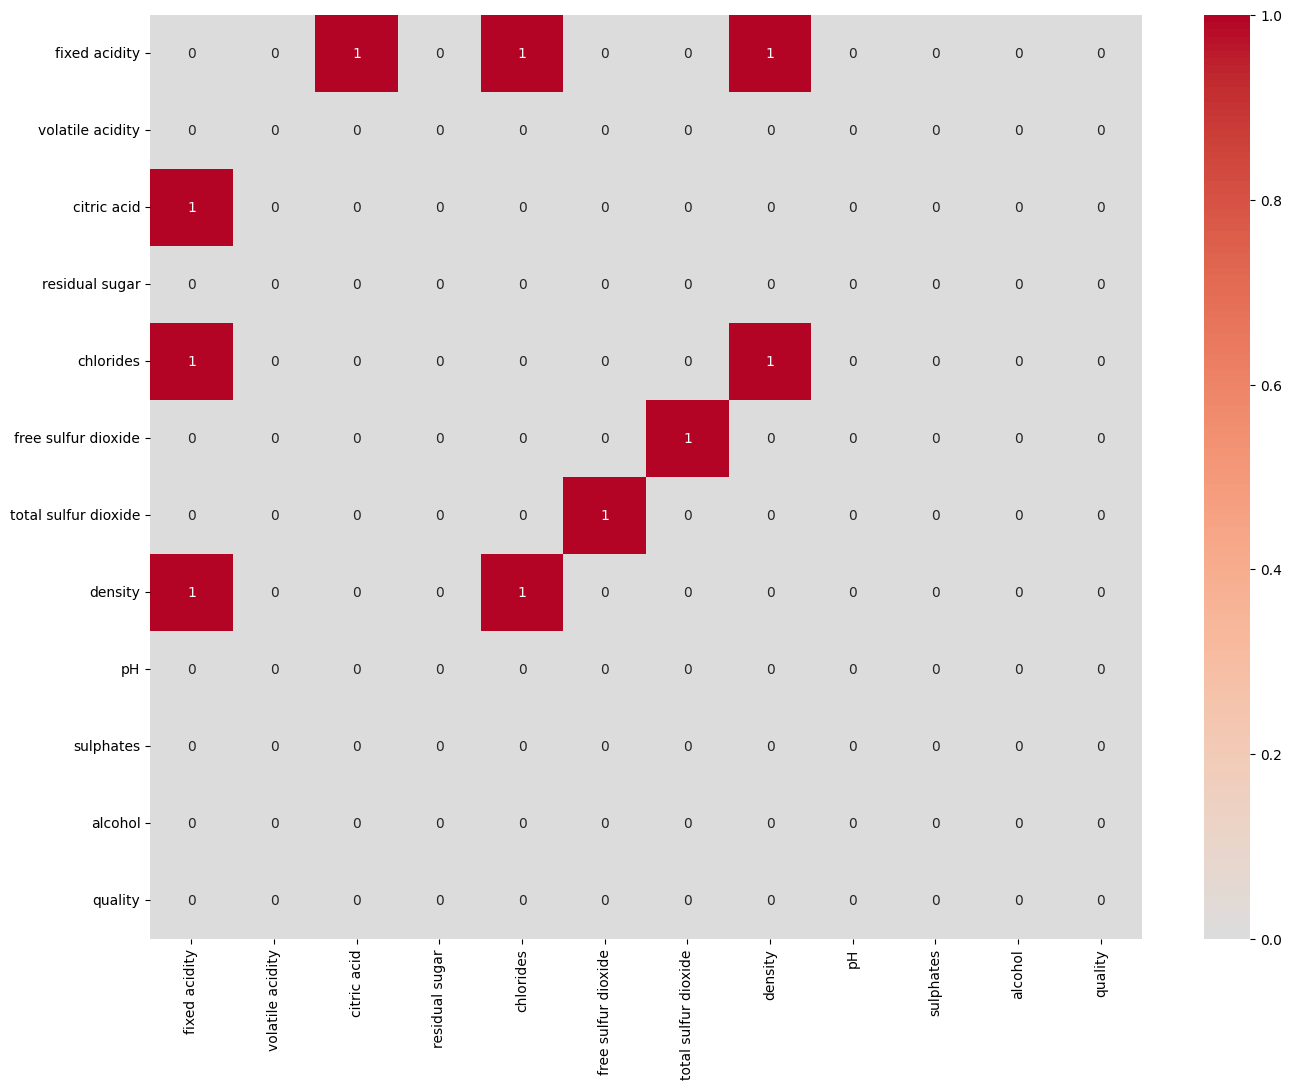

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_sin_strings = df_max_calidad.copy()
df_sin_strings = df_sin_strings.drop(columns=['type'])
correlation_matrix = df_sin_strings.corr()

# tomamos el valor absoluto de las correlaciones, umbralamos las mayores a 0.5
correlation_matrix_umbralizada = correlation_matrix.abs() > 0.6
# aprovechamos y sacamos la diagonal
np.fill_diagonal(correlation_matrix_umbralizada.values, 0)

# e imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12));
sns.heatmap(correlation_matrix_umbralizada, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

Realizamos un EDA para este fragmento del conjunto de datos:

In [31]:
nombre_archivo = "vinos_max_calidad"

# Generamos el reporte
report = pp.ProfileReport(df_max_calidad)

# Lo mostramos interactivo en nuestra notebook
if not Path(f"{nombre_archivo}.html").exists():
    report.to_file(output_file=(f"{nombre_archivo}.html"))
else:
    print("ya está creado, relaja que ahí te lo abro")

# Abrir el archivo HTML
webbrowser.open(f'{nombre_archivo}.html')



ya está creado, relaja que ahí te lo abro


True

Seguimos analizando relaciones con el conjunto de datos completo:

C:\Users\Tomas\AppData\Local\Temp\ipykernel_5624\2162378965.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["fixed acidity"],


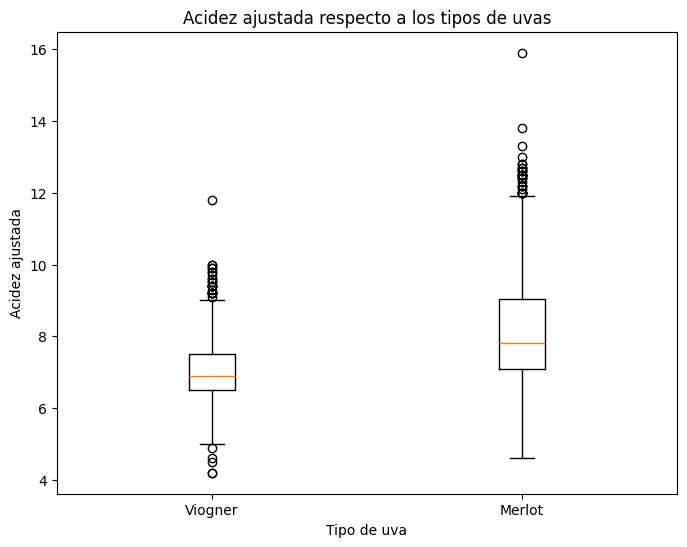

In [181]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["fixed acidity"],
             df_filtrado[df_filtrado["type"] == "Merlot"]["fixed acidity"]],
             labels=["Viogner", "Merlot"])
# Agregar etiquetas a los ejes
plt.xlabel("Tipo de uva")
plt.ylabel("Acidez ajustada")

# Agregar un título al gráfico
plt.title("Acidez ajustada respecto a los tipos de uvas")

# Mostrar el gráfico
plt.show()

C:\Users\Tomas\AppData\Local\Temp\ipykernel_5624\1484675125.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["density"],


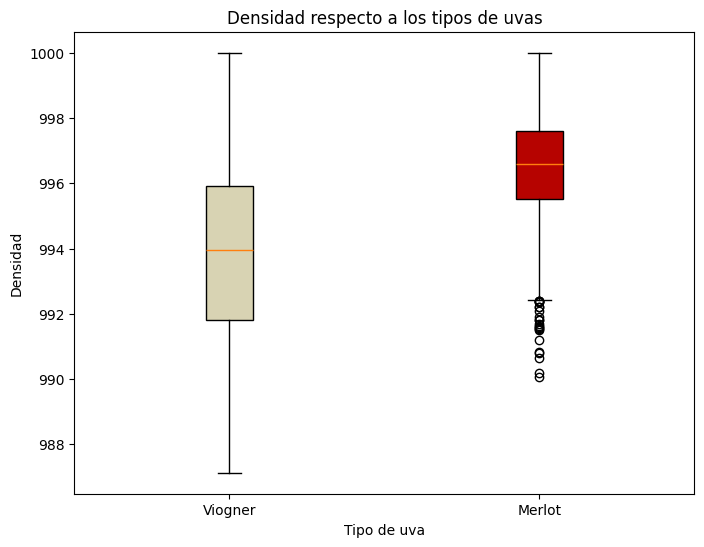

In [34]:
import matplotlib.pyplot as plt

# Crear el boxplot
plt.figure(figsize=(8, 6))
box = plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["density"],
                   df_filtrado[df_filtrado["type"] == "Merlot"]["density"]],
                  labels=["Viogner", "Merlot"], patch_artist=True)

# Asignar colores personalizados a cada boxplot
colors = ['#d8d3b3', '#b60300']  # Beige y Bordó en formato hexadecimal
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Agregar etiquetas a los ejes
plt.xlabel("Tipo de uva")
plt.ylabel("Densidad")

# Agregar un título al gráfico
plt.title("Densidad respecto a los tipos de uvas")

# Mostrar el gráfico
plt.show()


Esto puede es interesante ya que si la densidad es mayor en un tipo de uva, el porcentaje de alcohol también debería ser menor segun la relacion encontrada anteriormente.

Creo un gráfico de barras para simplificar la informacion a mostrar:

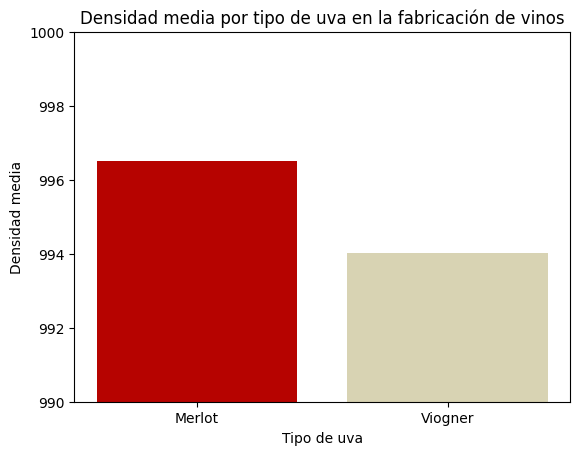

In [ ]:
# Agrupar por tipo de uva y calcular la media de la densidad
media_densidad = df_filtrado.groupby('type')['density'].mean().reset_index()

colors = ['#b60300', '#d8d3b3']

# Crear el gráfico de barras con colores personalizados
plt.bar(media_densidad['type'], media_densidad['density'], color=colors)

# Agregar etiquetas a los ejes
plt.xlabel("Tipo de uva")
plt.ylabel("Densidad media")
plt.ylim(990, 1000)

# Agregar un título al gráfico
plt.title("Densidad media por tipo de uva en la fabricación de vinos")

# Mostrar el gráfico
plt.show()

C:\Users\Tomas\AppData\Local\Temp\ipykernel_5624\2576040227.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["volatile acidity"],


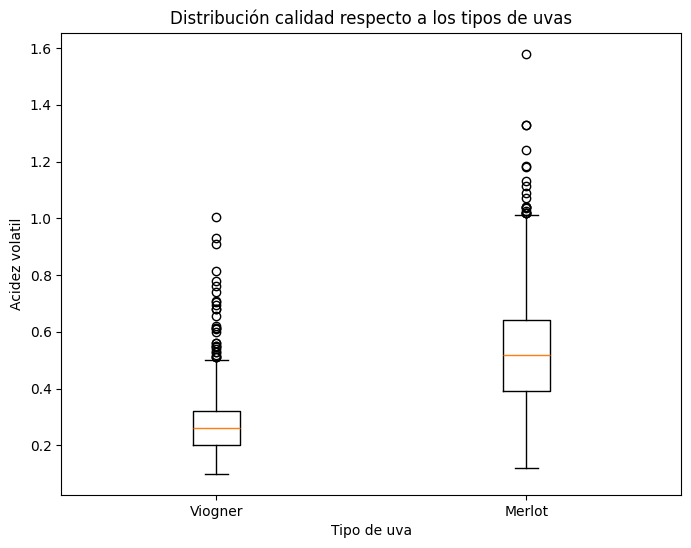

In [35]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["volatile acidity"],
             df_filtrado[df_filtrado["type"] == "Merlot"]["volatile acidity"]],
             labels=["Viogner", "Merlot"])
# Agregar etiquetas a los ejes
plt.xlabel("Tipo de uva")
plt.ylabel("Acidez volatil")

# Agregar un título al gráfico
plt.title("Distribución calidad respecto a los tipos de uvas")

# Mostrar el gráfico
plt.show()

Vemos que la axidez volatil varia de forma similar que la acidez ajustada lo cual tiene sentido.

In [36]:
procentaje_uva_max_calidad = (df_max_calidad["type"].value_counts() / len(df_max_calidad)) *100
procentaje_uva_max_calidad.round(2)

type
Viogner    70.18
Merlot     29.82
Name: count, dtype: float64

Observamos que hay mayor cantidad de vinos provenientes de uvas "Viogner" ranqueados con la maxima puntuacion.

Dividimos el conjunto de datos para analizar los vinos peores puntutados.

In [37]:
condicion = df_filtrado['quality'] == 3 # LOS VALORES CON LOS QUE TE QUERES QUEDAR  
df_menor_calidad = df_filtrado[condicion]

In [38]:
procentaje_uva_min_calidad = (df_menor_calidad["type"].value_counts() / len(df_menor_calidad)) *100
procentaje_uva_min_calidad

type
Merlot     60.0
Viogner    40.0
Name: count, dtype: float64

In [182]:
df_menor_calidad.count()

type                    15
fixed acidity           15
volatile acidity        15
citric acid             15
residual sugar          15
chlorides               15
free sulfur dioxide     15
total sulfur dioxide    15
density                 15
pH                      15
sulphates               15
alcohol                 15
quality                 15
dtype: int64

Parece que hay un poco mas de vinos "Merlot" en los vinos peores puntuados, aunque la muestra es demasiado chica para evaluar.

In [39]:
df_peor_ranking = df_filtrado[df_filtrado['quality'].isin([3, 4])]

procentaje_uva = (df_peor_ranking["type"].value_counts() / len(df_peor_ranking)) *100
procentaje_uva

type
Merlot     50.420168
Viogner    49.579832
Name: count, dtype: float64

A medida que agregamos mas vinos de distintas calidades vemos como la distribucion del tipo de uva se iguala.

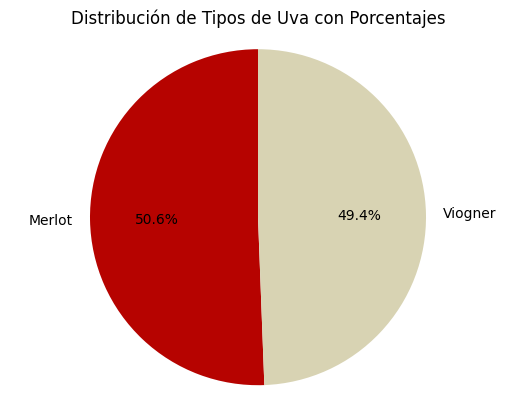

In [41]:
# Definir una lista de colores
colores = ['#b60300', '#d8d3b3']

# Contar la frecuencia de cada tipo de uva
type_counts = df_filtrado['type'].value_counts()

# Calcular los porcentajes
percentages = (type_counts / type_counts.sum()) * 100

# Crear el gráfico de torta
fig, ax = plt.subplots()
ax.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=colores, startangle=90)

# Añadir un título
ax.set_title('Distribución de Tipos de Uva con Porcentajes')

# Asegurar que el gráfico sea circular
ax.axis('equal')

# Mostrar el gráfico
plt.show()



Analizamos la distribución de los tipos de uva en el conjunto de datos original y vemos que es equitativa.

A continuacion gráficamos las distribucines de tipos de uva halladas anteriormente:

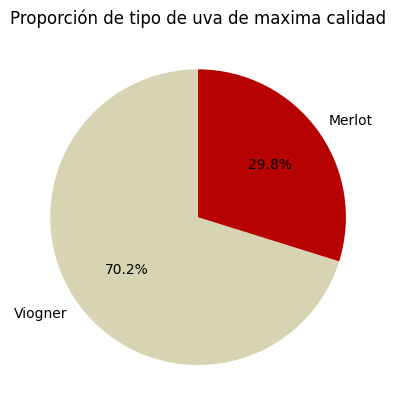

In [42]:
# Contar la cantidad de vinos Viogner y Merlot de mayor calidad
type_counts = df_max_calidad["type"].value_counts()

# Crear el gráfico de torta
type_counts = df_max_calidad["type"].value_counts()
labels = ["Merlot" if label == "Merlot" else "Viogner" for label in type_counts.index]
c= "#d6d4b2", "#b60200"
plt.pie(type_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors= c)

# Agregar un título al gráfico
plt.title("Proporción de tipo de uva de maxima calidad")

# Mostrar el gráfico
plt.show()


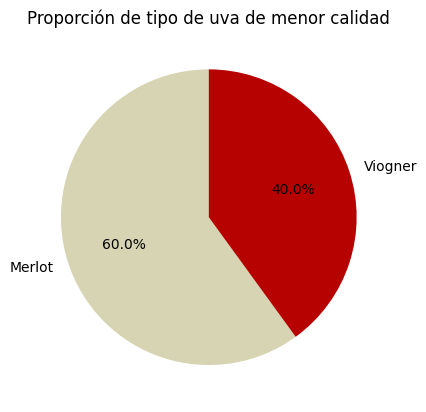

In [43]:
# Contar la cantidad de tipos de uvas de menor calidad
type_counts = df_menor_calidad["type"].value_counts()

# Crear el gráfico de torta
type_counts = df_menor_calidad["type"].value_counts()
labels = ["Viogner" if label == "Viogner" else "Merlot" for label in type_counts.index]
c= "#d6d4b2", "#b60200"
plt.pie(type_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors= c)

# Agregar un título al gráfico
plt.title("Proporción de tipo de uva de menor calidad")

# Mostrar el gráfico
plt.show()


La uva Viogner tiene menor acidez volatil y ajustada en promedio que la uva Merlot, además de los vinos de maxima calidad hay mas Viogner que Merlot

C:\Users\Tomas\AppData\Local\Temp\ipykernel_5624\2166294571.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["citric acid"],


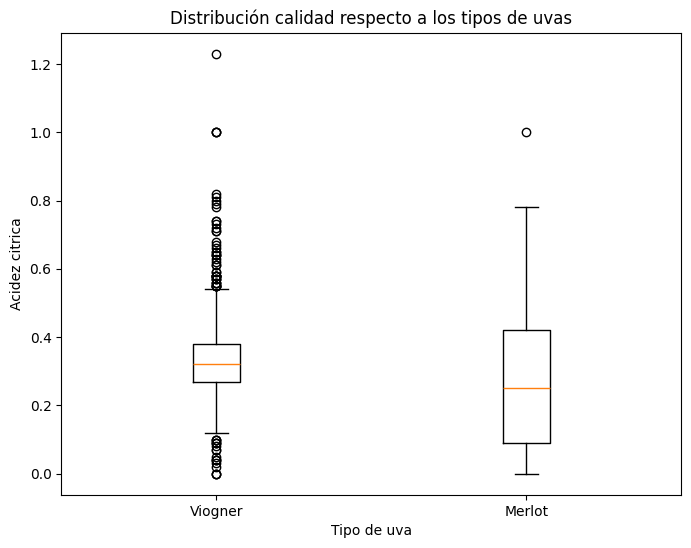

In [44]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["citric acid"],
             df_filtrado[df_filtrado["type"] == "Merlot"]["citric acid"]],
             labels=["Viogner", "Merlot"])
# Agregar etiquetas a los ejes
plt.xlabel("Tipo de uva")
plt.ylabel("Acidez citrica")

# Agregar un título al gráfico
plt.title("Distribución calidad respecto a los tipos de uvas")

# Mostrar el gráfico
plt.show()

C:\Users\Tomas\AppData\Local\Temp\ipykernel_5624\4285796727.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["residual sugar"],


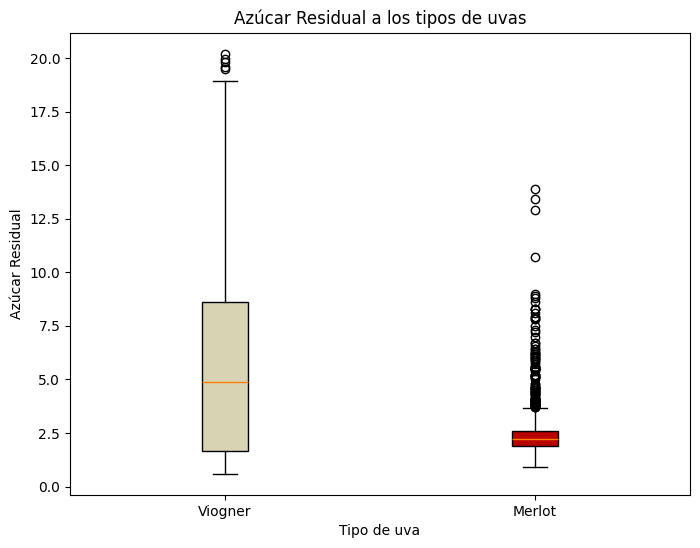

In [45]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
box = plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["residual sugar"],
                   df_filtrado[df_filtrado["type"] == "Merlot"]["residual sugar"]],
                  labels=["Viogner", "Merlot"], patch_artist=True)

# Asignar colores personalizados a cada boxplot
colors = ['#d8d3b3', '#b60300']  # Beige y Bordó en formato hexadecimal
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Agregar etiquetas a los ejes
plt.xlabel("Tipo de uva")
plt.ylabel("Azúcar Residual")

# Agregar un título al gráfico
plt.title("Azúcar Residual a los tipos de uvas")

# Mostrar el gráfico
plt.show()

Hago un gráfico de barras para mayor comprension.

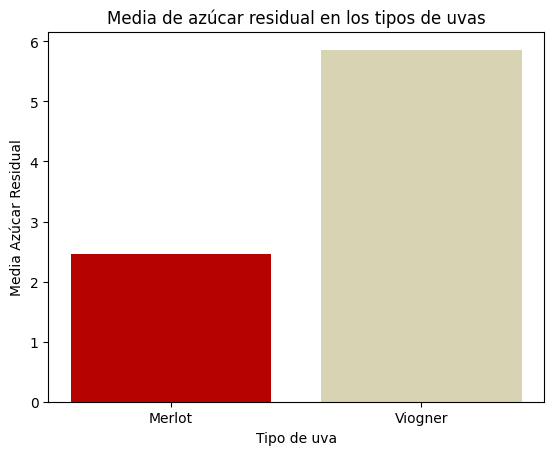

In [136]:
# Agrupar por tipo de uva y calcular la media del azúcar residual
media_azucar = df_filtrado.groupby('type')['residual sugar'].mean().reset_index()

# Crear el gráfico de barras con colores personalizados
plt.bar(media_azucar['type'], media_azucar['residual sugar'], color=colores)

# Agregar etiquetas a los ejes
plt.xlabel("Tipo de uva")
plt.ylabel("Media Azúcar Residual")

# Agregar un título al gráfico
plt.title("Media de azúcar residual en los tipos de uvas")

# Mostrar el gráfico
plt.show()


Clasificación según el azúcar residual:

    Vino extra seco: Hasta 4 g/L de azúcar residual. 
    
    Vino seco: Máximo 9g/L.
    
    Vino semiseco: Máximo 18 g/L. 
    
    Vino dulce: hasta 45 g/L. 
    
    https://glossaire.wein.plus/azucar-residual

C:\Users\Tomas\AppData\Local\Temp\ipykernel_5624\3348569293.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["pH"],


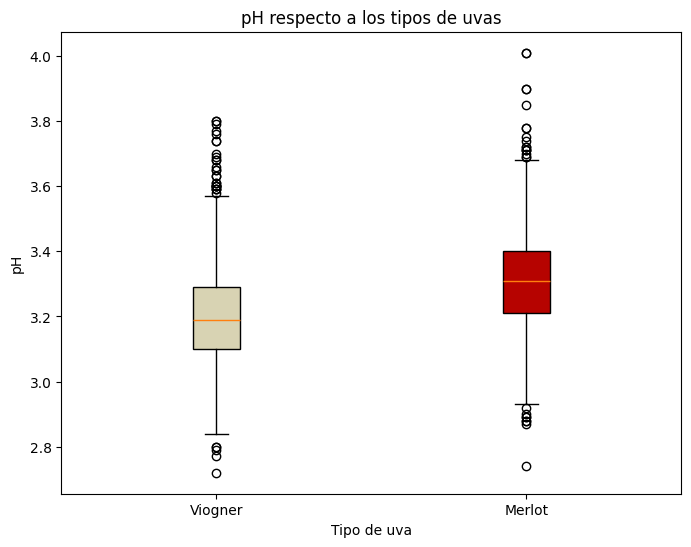

In [46]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
box = plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["pH"],
                   df_filtrado[df_filtrado["type"] == "Merlot"]["pH"]],
                  labels=["Viogner", "Merlot"], patch_artist=True)

# Asignar colores personalizados a cada boxplot
colors = ['#d8d3b3', '#b60300']  # Beige y Bordó en formato hexadecimal
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Agregar etiquetas a los ejes
plt.xlabel("Tipo de uva")
plt.ylabel("pH")

# Agregar un título al gráfico
plt.title("pH respecto a los tipos de uvas")

# Mostrar el gráfico
plt.show()

Hago un gráfico de barras para mayor comprensión.

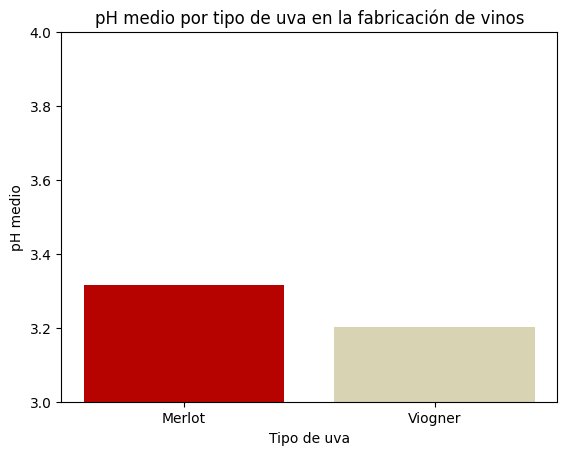

In [139]:
# Agrupar por tipo de uva y calcular la media del pH
media_densidad = df_filtrado.groupby('type')['pH'].mean().reset_index()

# Crear el gráfico de barras con colores personalizados
fig, ax = plt.subplots()
bars = ax.bar(media_densidad['type'], media_densidad['pH'], color=colores)

# Agregar etiquetas a los ejes
plt.xlabel("Tipo de uva")
plt.ylabel("pH medio")
plt.ylim(3, 4)

# Agregar un título al gráfico
plt.title("pH medio por tipo de uva en la fabricación de vinos")

# Mostrar el gráfico
plt.show()


Tener en cuenta que Viogner es un tipo de uva que se usa para hacer vino blanco y Merlot se usa para vino tinto.

C:\Users\Tomas\AppData\Local\Temp\ipykernel_5624\106761300.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["free sulfur dioxide"],


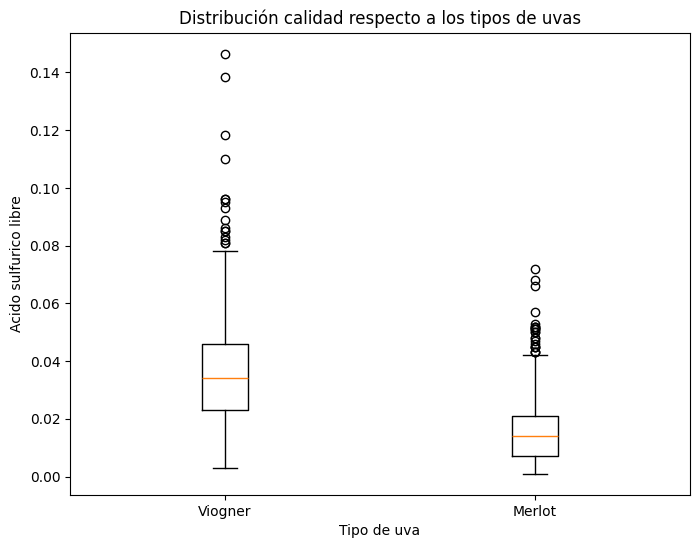

In [47]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["free sulfur dioxide"],
             df_filtrado[df_filtrado["type"] == "Merlot"]["free sulfur dioxide"]],
             labels=["Viogner", "Merlot"])
# Agregar etiquetas a los ejes
plt.xlabel("Tipo de uva")
plt.ylabel("Acido sulfurico libre")

# Agregar un título al gráfico
plt.title("Distribución calidad respecto a los tipos de uvas")

# Mostrar el gráfico
plt.show()

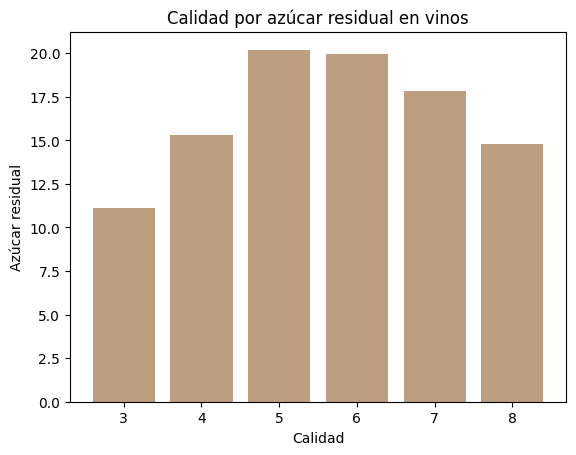

In [ ]:
plt.bar(df_filtrado["quality"], df_filtrado["residual sugar"], color="#bd9e81")

# Agregar etiquetas a los ejes
plt.xlabel("Calidad")
plt.ylabel("Azúcar residual")

# Agregar un título al gráfico
plt.title("Calidad por azúcar residual en vinos")

# Mostrar el gráfico
plt.show()

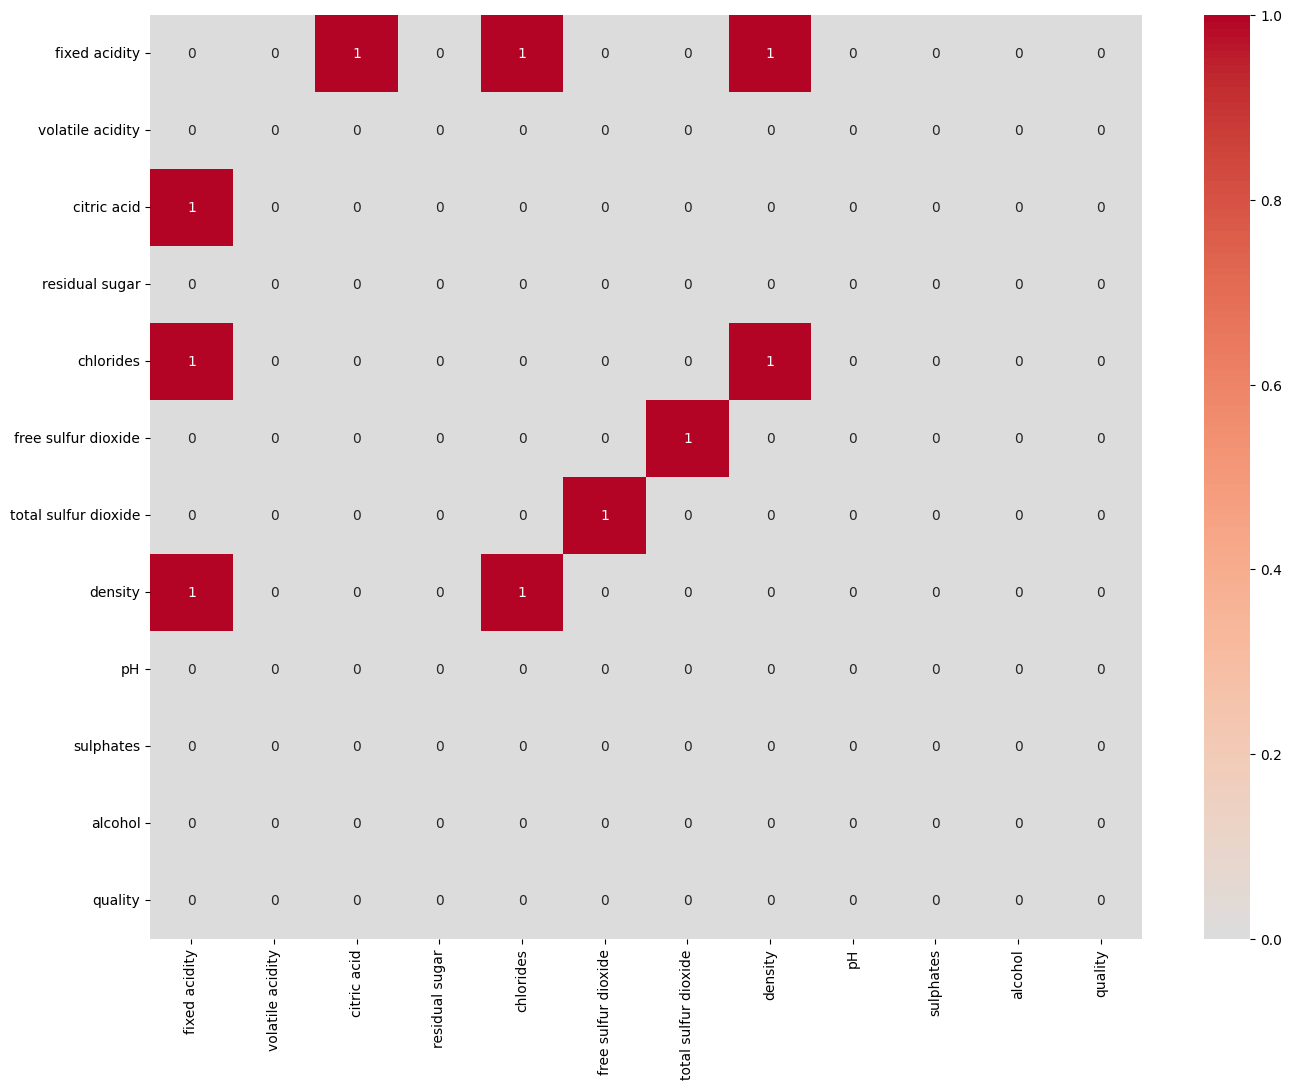

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_sin_strings = df_max_calidad.copy()
df_sin_strings = df_sin_strings.drop(columns=['type'])
correlation_matrix = df_sin_strings.corr()

# tomamos el valor absoluto de las correlaciones, umbralamos las mayores a 0.5
correlation_matrix_umbralizada = correlation_matrix.abs() > 0.6
# aprovechamos y sacamos la diagonal
np.fill_diagonal(correlation_matrix_umbralizada.values, 0)

# e imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12));
sns.heatmap(correlation_matrix_umbralizada, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

C:\Users\Tomas\AppData\Local\Temp\ipykernel_5624\3956710310.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_filtrado[df_filtrado["quality"] == 3]["density"],


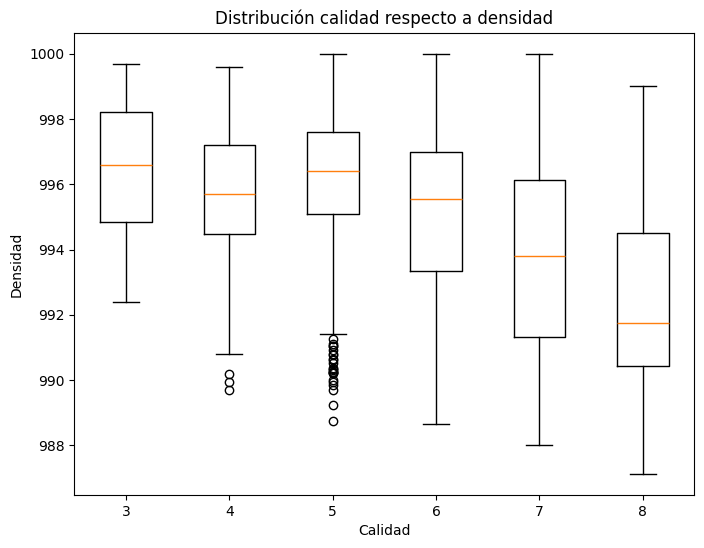

In [111]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df_filtrado[df_filtrado["quality"] == 3]["density"],
             df_filtrado[df_filtrado["quality"] == 4]["density"],
             df_filtrado[df_filtrado["quality"] == 5]["density"],
             df_filtrado[df_filtrado["quality"] == 6]["density"],
             df_filtrado[df_filtrado["quality"] == 7]["density"],
             df_filtrado[df_filtrado["quality"] == 8]["density"]],
             labels=["3", "4" ,"5", "6", "7", "8"])
# Agregar etiquetas a los ejes
plt.xlabel("Calidad")
plt.ylabel("Densidad")

# Agregar un título al gráfico
plt.title("Distribución calidad respecto a densidad")

# Mostrar el gráfico
plt.show()

OJO AL TEJO

C:\Users\Tomas\AppData\Local\Temp\ipykernel_5624\225601634.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_filtrado[df_filtrado["quality"] == 3]["alcohol"],


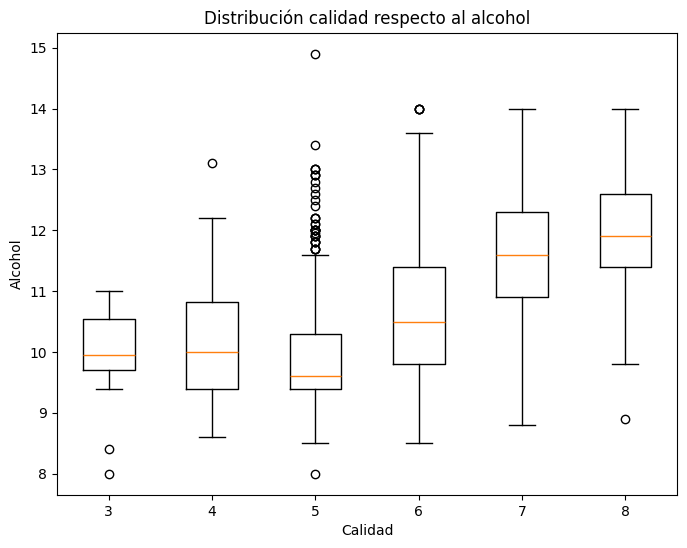

In [110]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df_filtrado[df_filtrado["quality"] == 3]["alcohol"],
             df_filtrado[df_filtrado["quality"] == 4]["alcohol"],
             df_filtrado[df_filtrado["quality"] == 5]["alcohol"],
             df_filtrado[df_filtrado["quality"] == 6]["alcohol"],
             df_filtrado[df_filtrado["quality"] == 7]["alcohol"],
             df_filtrado[df_filtrado["quality"] == 8]["alcohol"]],
             labels=["3", "4" ,"5", "6", "7", "8"])
# Agregar etiquetas a los ejes
plt.xlabel("Calidad")
plt.ylabel("Alcohol")

# Agregar un título al gráfico
plt.title("Distribución calidad respecto al alcohol")

# Mostrar el gráfico
plt.show()

In [53]:
condicion = df_filtrado['type'] == "Viogner" # LOS VALORES CON LOS QUE TE QUERES QUEDAR  
df_viogner = df_filtrado[condicion]
df_viogner

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Viogner,7.4,0.190,0.49,6.7,0.037,0.015,0.110,993.80,3.20,0.38,11.0,7
2,Viogner,7.5,0.140,0.74,1.6,0.035,0.021,0.126,993.30,3.26,0.45,10.2,6
3,Viogner,7.8,0.490,0.49,7.0,0.043,0.029,0.149,995.20,3.21,0.33,10.0,5
4,Viogner,8.1,0.120,0.49,1.2,0.042,0.043,0.160,993.40,3.13,0.48,9.7,6
5,Viogner,7.6,0.470,0.49,13.0,0.239,0.042,0.220,998.80,2.96,0.51,9.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622,Viogner,7.4,0.190,0.31,14.5,0.045,0.039,0.193,998.60,3.10,0.50,9.2,6
1628,Viogner,6.3,0.320,0.32,1.5,0.030,0.024,0.101,989.23,3.21,0.42,13.0,5
1630,Viogner,6.5,0.260,0.31,3.6,0.030,0.036,0.092,990.26,3.22,0.62,12.6,8
1631,Viogner,5.9,0.240,0.12,1.4,0.035,0.060,0.247,993.58,3.34,0.44,9.6,6


In [54]:
condicion = df_filtrado['type'] == "Merlot" # LOS VALORES CON LOS QUE TE QUERES QUEDAR  
df_merlot = df_filtrado[condicion]
df_merlot

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1633,Merlot,7.4,0.700,0.00,1.9,0.076,0.011,0.034,997.80,3.51,0.56,9.4,5
1634,Merlot,7.8,0.880,0.00,2.6,0.098,0.025,0.067,996.80,3.20,0.68,9.8,5
1635,Merlot,7.8,0.760,0.04,2.3,0.092,0.015,0.054,997.00,3.26,0.65,9.8,5
1636,Merlot,11.2,0.280,0.56,1.9,0.075,0.017,0.060,998.00,3.16,0.58,9.8,6
1638,Merlot,7.4,0.660,0.00,1.8,0.075,0.013,0.040,997.80,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,Merlot,6.8,0.620,0.08,1.9,0.068,0.028,0.038,996.51,3.42,0.82,9.5,6
3227,Merlot,6.2,0.600,0.08,2.0,0.090,0.032,0.044,994.90,3.45,0.58,10.5,5
3228,Merlot,5.9,0.550,0.10,2.2,0.062,0.039,0.051,995.12,3.52,0.76,11.2,6
3230,Merlot,5.9,0.645,0.12,2.0,0.075,0.032,0.044,995.47,3.57,0.71,10.2,5


In [55]:
nombre_archivo = "vinosMerlot"

# Generamos el reporte
report = pp.ProfileReport(df_merlot)

# Lo mostramos interactivo en nuestra notebook
if not Path(f"{nombre_archivo}.html").exists():
    report.to_file(output_file=(f"{nombre_archivo}.html"))
else:
    print("ya está creado, relaja que ahí te lo abro")

# Abrir el archivo HTML
webbrowser.open(f'{nombre_archivo}.html')

ya está creado, relaja que ahí te lo abro


True

In [56]:
nombre_archivo = "vinosViogner"

# Generamos el reporte
report = pp.ProfileReport(df_viogner)

# Lo mostramos interactivo en nuestra notebook
if not Path(f"{nombre_archivo}.html").exists():
    report.to_file(output_file=(f"{nombre_archivo}.html"))
else:
    print("ya está creado, relaja que ahí te lo abro")

# Abrir el archivo HTML
webbrowser.open(f'{nombre_archivo}.html')

ya está creado, relaja que ahí te lo abro


True

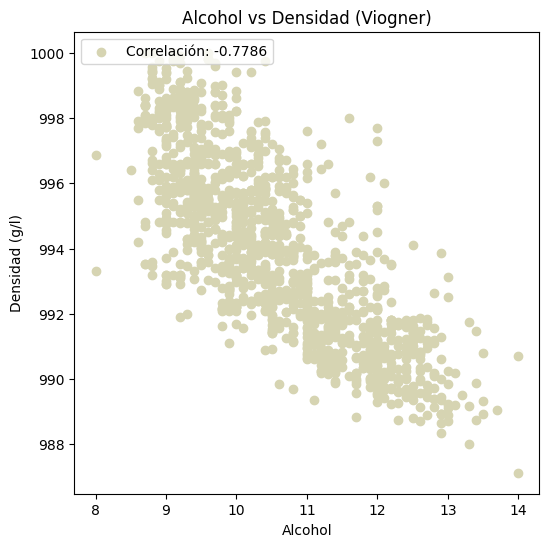

In [57]:
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

datos_columna1 = df_viogner["alcohol"]
datos_columna2 = df_viogner["density"]
coeficiente_correlacion = np.corrcoef(datos_columna1, datos_columna2)[0, 1]

plt.scatter(datos_columna1, datos_columna2, c="#d6d4b2")

# Añadir etiquetas y título
plt.ylabel("Densidad (g/l)")
plt.xlabel("Alcohol")
plt.title("Alcohol vs Densidad (Viogner)")
plt.legend([f"Correlación: {coeficiente_correlacion:.4f}"], loc="upper left")

# Mostrar el gráfico
plt.show()

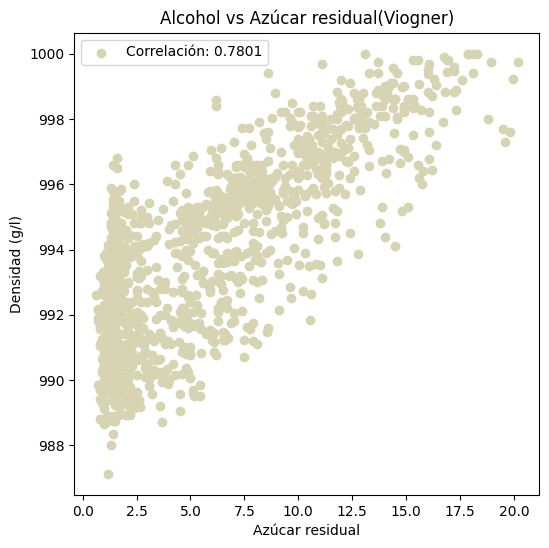

In [58]:
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

datos_columna1 = df_viogner["residual sugar"]
datos_columna2 = df_viogner["density"]
coeficiente_correlacion = np.corrcoef(datos_columna1, datos_columna2)[0, 1]

plt.scatter(datos_columna1, datos_columna2, c="#d6d4b2")

# Añadir etiquetas y título
plt.ylabel("Densidad (g/l)")
plt.xlabel("Azúcar residual")
plt.title("Alcohol vs Azúcar residual(Viogner)")
plt.legend([f"Correlación: {coeficiente_correlacion:.4f}"], loc="upper left")

# Mostrar el gráfico
plt.show()

C:\Users\Tomas\AppData\Local\Temp\ipykernel_5624\689693207.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_filtrado[df_filtrado["quality"] == 3]["residual sugar"],


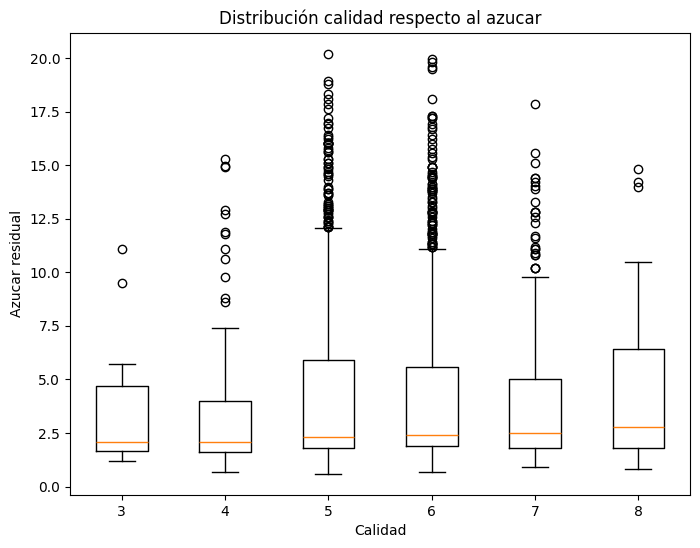

In [59]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df_filtrado[df_filtrado["quality"] == 3]["residual sugar"],
             df_filtrado[df_filtrado["quality"] == 4]["residual sugar"],
             df_filtrado[df_filtrado["quality"] == 5]["residual sugar"],
             df_filtrado[df_filtrado["quality"] == 6]["residual sugar"],
             df_filtrado[df_filtrado["quality"] == 7]["residual sugar"],
             df_filtrado[df_filtrado["quality"] == 8]["residual sugar"]],
             labels=["3", "4" ,"5", "6", "7", "8"])
# Agregar etiquetas a los ejes
plt.xlabel("Calidad")
plt.ylabel("Azucar residual")

# Agregar un título al gráfico
plt.title("Distribución calidad respecto al azucar")

# Mostrar el gráfico
plt.show()

C:\Users\Tomas\AppData\Local\Temp\ipykernel_5624\2176849186.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_viogner[df_viogner["quality"] == 3]["alcohol"],


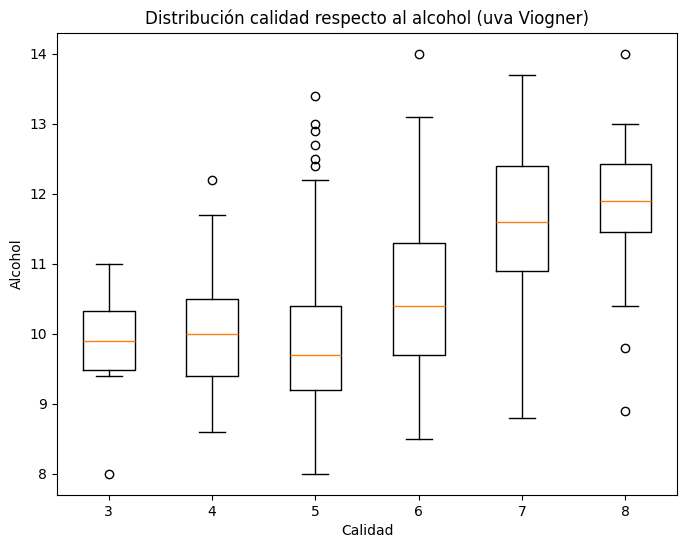

In [60]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df_viogner[df_viogner["quality"] == 3]["alcohol"],
             df_viogner[df_viogner["quality"] == 4]["alcohol"],
             df_viogner[df_viogner["quality"] == 5]["alcohol"],
             df_viogner[df_viogner["quality"] == 6]["alcohol"],
             df_viogner[df_viogner["quality"] == 7]["alcohol"],
             df_viogner[df_viogner["quality"] == 8]["alcohol"]],
             labels=["3", "4" ,"5", "6", "7", "8"])
# Agregar etiquetas a los ejes
plt.xlabel("Calidad")
plt.ylabel("Alcohol")

# Agregar un título al gráfico
plt.title("Distribución calidad respecto al alcohol (uva Viogner)")

# Mostrar el gráfico
plt.show()

C:\Users\Tomas\AppData\Local\Temp\ipykernel_5624\1922142827.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_merlot[df_merlot["quality"] == 3]["alcohol"],


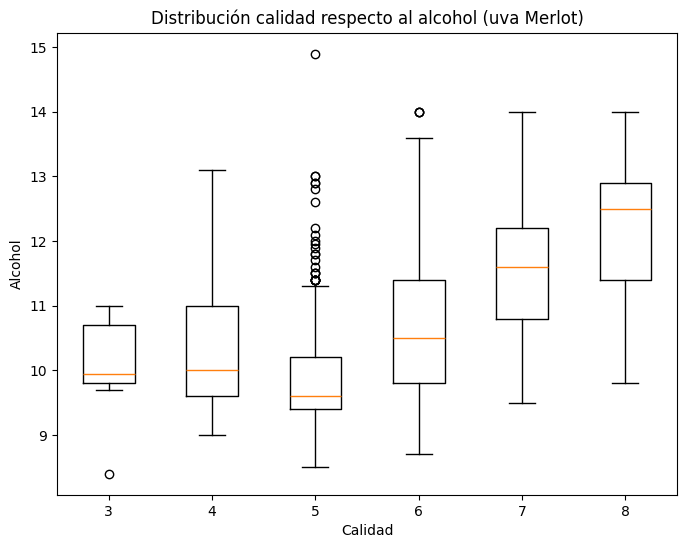

In [61]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df_merlot[df_merlot["quality"] == 3]["alcohol"],
             df_merlot[df_merlot["quality"] == 4]["alcohol"],
             df_merlot[df_merlot["quality"] == 5]["alcohol"],
             df_merlot[df_merlot["quality"] == 6]["alcohol"],
             df_merlot[df_merlot["quality"] == 7]["alcohol"],
             df_merlot[df_merlot["quality"] == 8]["alcohol"]],
             labels=["3", "4" ,"5", "6", "7", "8"])
# Agregar etiquetas a los ejes
plt.xlabel("Calidad")
plt.ylabel("Alcohol")

# Agregar un título al gráfico
plt.title("Distribución calidad respecto al alcohol (uva Merlot)")

# Mostrar el gráfico
plt.show()

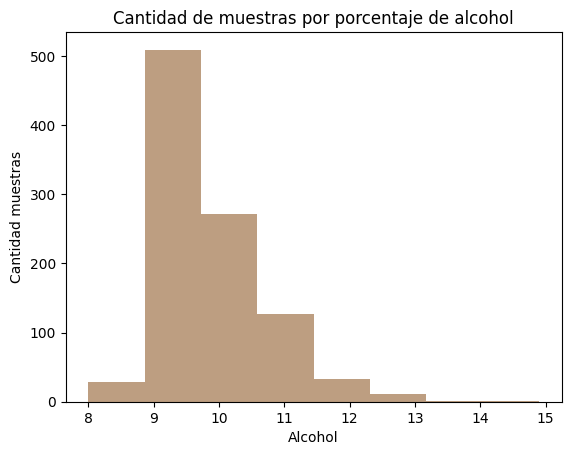

In [62]:
condicion = df_filtrado['quality'] == 5 # LOS VALORES CON LOS QUE TE QUERES QUEDAR  
df_calidad5 = df_filtrado[condicion]
plt.hist(df_calidad5["alcohol"], bins=8, color="#bd9e81")

# Agregar etiquetas a los ejes
plt.xlabel("Alcohol")
plt.ylabel("Cantidad muestras")

# Agregar un título al gráfico
plt.title("Cantidad de muestras por porcentaje de alcohol")
#plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor visualización
# Mostrar el gráfico
plt.show()

In [63]:
df_peor_ranking = df_filtrado[df_filtrado['quality'].isin([3, 4])]

procentaje_uva = (df_filtrado["type"].value_counts() / len(df_filtrado)) *100
procentaje_uva.round(2)

type
Merlot     50.6
Viogner    49.4
Name: count, dtype: float64

REDUCCION DE DIMENSIONES: PCA


In [64]:
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# estandarizamos X
scaler = StandardScaler()
X = df_filtrado.copy()
X = X.drop(['type','quality'], axis=1)
X_scaled = scaler.fit_transform(X)

print(np.std(X_scaled, axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [65]:
df_niveles_calidad = df_filtrado.copy()
df_niveles_calidad['quality'] = df_filtrado['quality'].map({3: 1, 4: 1, 5: 2, 6: 2, 7: 3, 8: 3})

In [157]:
df_filtrado

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Viogner,7.4,0.190,0.49,6.7,0.037,0.015,0.110,993.80,3.20,0.38,11.0,7
2,Viogner,7.5,0.140,0.74,1.6,0.035,0.021,0.126,993.30,3.26,0.45,10.2,6
3,Viogner,7.8,0.490,0.49,7.0,0.043,0.029,0.149,995.20,3.21,0.33,10.0,5
4,Viogner,8.1,0.120,0.49,1.2,0.042,0.043,0.160,993.40,3.13,0.48,9.7,6
5,Viogner,7.6,0.470,0.49,13.0,0.239,0.042,0.220,998.80,2.96,0.51,9.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,Merlot,6.8,0.620,0.08,1.9,0.068,0.028,0.038,996.51,3.42,0.82,9.5,6
3227,Merlot,6.2,0.600,0.08,2.0,0.090,0.032,0.044,994.90,3.45,0.58,10.5,5
3228,Merlot,5.9,0.550,0.10,2.2,0.062,0.039,0.051,995.12,3.52,0.76,11.2,6
3230,Merlot,5.9,0.645,0.12,2.0,0.075,0.032,0.044,995.47,3.57,0.71,10.2,5


Antes de PCA: (2575, 11)
Después de PCA: (2575, 2)


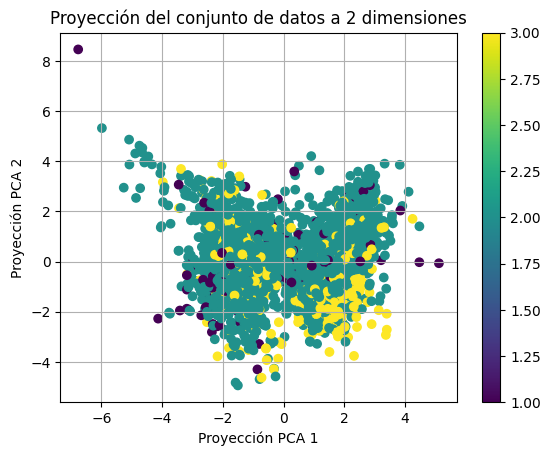

array([0.30046117, 0.20397778])

In [170]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# declaramos un objeto PCA que mapee n dimensions a p=2, y que además
# normalice esas features (whiten=True)
pca = PCA(n_components=2, whiten=False)
# le pedimos al objeto que se ajuste utilizando los datos (fit) y que además
# transforme los datos, para ya reducir a dos dimensiones
principalComponents = pca.fit_transform(X)
# imprimimos los tamaños antes y después
print('Antes de PCA: {}'.format(X.shape))
print('Después de PCA: {}'.format(principalComponents.shape))

# graficamos los datos. el color de cada punto representa la calidad del vino
# Ahora aplicamos PCA a los datos estandarizados
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:,0], X_pca[:,1], c=df_niveles_calidad["quality"], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()
pca.explained_variance_ratio_

Antes de PCA: (2575, 11)
Después de PCA: (2575, 2)


C:\Users\Tomas\AppData\Local\Temp\ipykernel_5624\2701855071.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:,0], X_pca[:,1], c=colors, cmap='viridis')


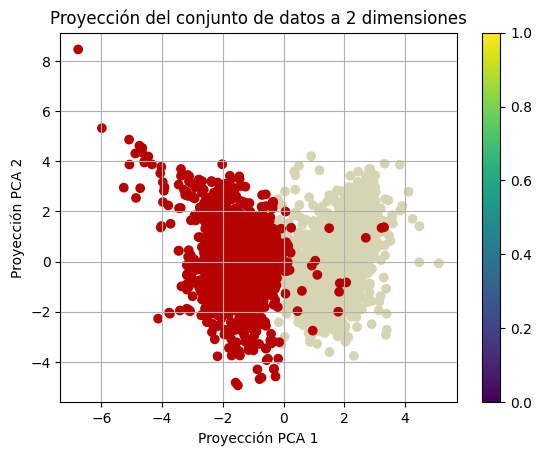

In [67]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# declaramos un objeto PCA que mapee n dimensions a p=2, y que además
# normalice esas features (whiten=True)
pca = PCA(n_components=2, whiten=False)
# le pedimos al objeto que se ajuste utilizando los datos (fit) y que además
# transforme los datos, para ya reducir a dos dimensiones
principalComponents = pca.fit_transform(X)
# imprimimos los tamaños antes y después
print('Antes de PCA: {}'.format(X.shape))
print('Después de PCA: {}'.format(principalComponents.shape))

# Asignamos colores a las categorías de "type" 
type_colors = {'Viogner': '#d6d4b2', 'Merlot': '#b60200'} 
# Asegúrate de que estos nombres coincidan con los de tu columna "type" 
colors = df_filtrado['type'].map(type_colors)

# graficamos los datos. el color de cada punto representa la calidad del vino
# Ahora aplicamos PCA a los datos estandarizados
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:,0], X_pca[:,1], c=colors, cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()

T-SNE

In [178]:
# importamos el t-SNE
from sklearn.manifold import TSNE

# creamos el objeto, lo fitteamos en nuestros datos y lo aplicamos sobre esos mismos
#X_tsne = TSNE(n_components=2).fit_transform(X_train_stand) # sin random state
X_tsne = TSNE(n_components=2, random_state=10).fit_transform(X_scaled)  # con random state
# imprimimos los tamaños antes y después
print('Before t-SNE: {}'.format(X_scaled.shape))
print('After t-SNE: {}'.format(X_tsne.shape))

Before t-SNE: (2575, 11)
After t-SNE: (2575, 2)


Graficamos t-SNE:

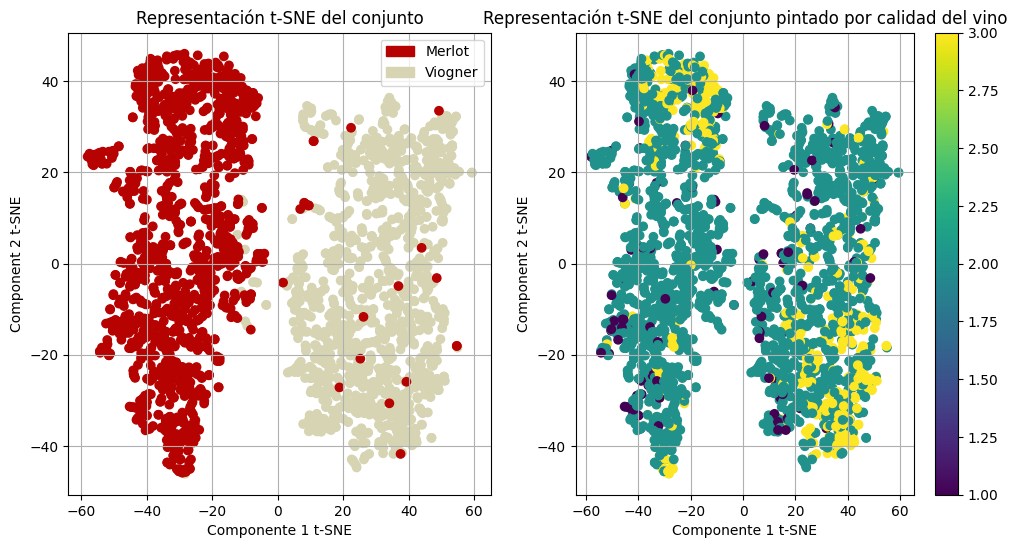

In [179]:
import matplotlib.patches as mpatches 

# Asignamos colores a las categorías de "type" 
type_colors = {'Viogner': '#d6d4b2', 'Merlot': '#b60200'} 
# Asegúrate de que estos nombres coincidan con los de tu columna "type" 
colors = df_filtrado['type'].map(type_colors)

plt.figure(figsize=(12, 6))

# Gráfico de dispersión para Schooling vs Expectativa de vida
plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=colors)
plt.grid(True)
plt.xlabel('Componente 1 t-SNE')
plt.ylabel('Component 2 t-SNE')
plt.title('Representación t-SNE del conjunto')
# Crear leyendas
tv = mpatches.Patch(color='#b60200', label='Merlot') 
tm = mpatches.Patch(color='#d6d4b2', label='Viogner') 
plt.legend(handles=[tv, tm])

plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=df_niveles_calidad["quality"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 t-SNE')
plt.ylabel('Component 2 t-SNE')
plt.title('Representación t-SNE del conjunto pintado por calidad del vino')
plt.colorbar()

CLUSTERING

In [70]:
from sklearn.preprocessing import MinMaxScaler    

# Seleccionamos las columnas numéricas para la normalización
numeric_cols = df_filtrado.select_dtypes(include=np.number).columns

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustamos el scaler a los datos y transformamos los datos
df_escalado = df_filtrado.copy()
df_escalado[numeric_cols] = scaler.fit_transform(df_escalado[numeric_cols])

# Imprimimos el DataFrame con los datos normalizados
df_escalado.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Viogner,0.273504,0.060811,0.398374,0.311224,0.041736,0.096220,0.307692,0.518260,0.372093,0.089888,0.434783,0.8
2,Viogner,0.282051,0.027027,0.601626,0.051020,0.038397,0.137457,0.355030,0.479409,0.418605,0.129213,0.318841,0.6
3,Viogner,0.307692,0.263514,0.398374,0.326531,0.051753,0.192440,0.423077,0.627040,0.379845,0.061798,0.289855,0.4
4,Viogner,0.333333,0.013514,0.398374,0.030612,0.050083,0.288660,0.455621,0.487179,0.317829,0.146067,0.246377,0.6
5,Viogner,0.290598,0.250000,0.398374,0.632653,0.378965,0.281787,0.633136,0.906760,0.186047,0.162921,0.173913,0.4


In [71]:
from sklearn.cluster import KMeans

# separamos las features de la puntuacion de los vinos
quality = df_escalado['quality']
features_data_vinos = df_escalado.drop(columns=['type', 'quality'])

# inicializamos un objeto de la clase KMeans con el modelo
kmeans = KMeans(n_clusters=4, verbose=0, random_state=10)
# lo aplicamos sobre nuestros datos para hallar los centroides
kmeans.fit(features_data_vinos)
# y obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans = kmeans.predict(features_data_vinos)
print(clusters_kmeans)

[2 2 3 ... 0 0 1]


In [72]:
import pandas as pd

# Creamos un DataFrame con los países y los clusters asignados
cluster_df = pd.DataFrame({'Quality': quality, 'Cluster': clusters_kmeans})

# Imprimimos los países de cada cluster
for cluster_num in range(4):
  print(f"\nCluster {cluster_num}:")
  print(cluster_df[cluster_df['Cluster'] == cluster_num]['Quality'].tolist())


Cluster 0:
[0.19999999999999996, 0.3999999999999999, 0.3999999999999999, 0.6000000000000001, 0.19999999999999996, 0.3999999999999999, 0.6000000000000001, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.19999999999999996, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.8, 0.8, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.19999999999999996, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.6000000000000001, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.6000000000000001, 0.3999999999999999, 0.6000000000000001, 0.3999999999999999, 0.3999999999999999, 0.6000000000000001, 0.6000000000000001, 0.19999999999999996, 0.19999999999999996, 0.6000000000000001, 0.3999999999999999, 0.3999999999999999, 0.19999999999999996, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.3999999999999999, 0.6000000000000001, 0.6000000000000001, 0.60000000

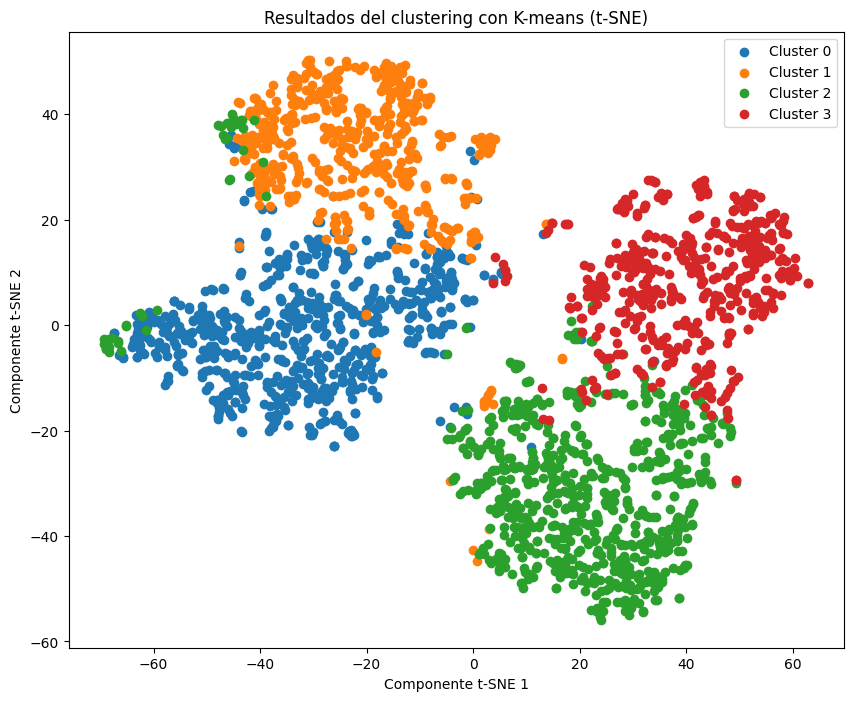

In [73]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reducir la dimensionalidad de los datos usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_data_vinos)

# Crear un DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({'x': tsne_results[:, 0], 'y': tsne_results[:, 1], 'Cluster': clusters_kmeans, 'Quality': quality})

# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(4):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.show()


En el cluster rojo se encuentran los vinos de mayor cantidaad de azucar residual.

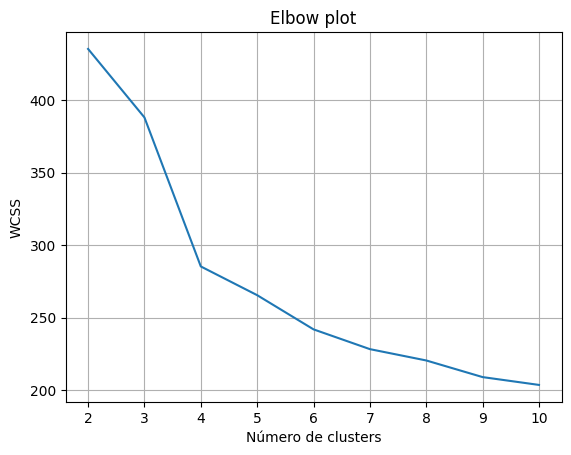

In [74]:
from sklearn.cluster import KMeans

# calculamos cada KMean para cada número de clusters, y nos quedamos con el valor
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(features_data_vinos)
    wcss.append(kmeans.inertia_)

# graficamos el elbow plot
plt.plot(range(2, 11), wcss)
plt.title('Elbow plot')
plt.grid("True")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

Chequeamos normalidad en la distribucion de la variable: azucar residual
para comprobar la hipotesis: vinos blancos(viogner) mas dulces

In [75]:
from scipy.stats import shapiro

df_azucar_vinos_merlot = df_filtrado[df_filtrado['type'] == "Merlot"]['residual sugar']
df_azucar_vinos_viogner = df_filtrado[df_filtrado['type'] == "Viogner"]['residual sugar']
stat, p = shapiro(df_azucar_vinos_merlot)
print(f"Test de Shapiro-Wilk para vinos merlot: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = shapiro(df_azucar_vinos_viogner)
print(f"Test de Shapiro-Wilk para vinos viogner: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos merlot: Estadístico=0.610, p-valor=0.000
Test de Shapiro-Wilk para vinos viogner: Estadístico=0.896, p-valor=0.000


In [76]:

import scipy.stats as stats
stat, p = stats.levene(df_azucar_vinos_merlot, df_azucar_vinos_viogner)
print(f"Test de Levene para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")


Test de Levene para GDP_per_capita: Estadístico=1554.171, p-valor=0.000


Como los datos no son NORMALES ni HOMOCEDASTICOS hacemos kruskal-wallis:

In [77]:
stat, p = stats.kruskal(df_azucar_vinos_merlot, df_azucar_vinos_viogner)
print(f"Test de Kruskal-Wallis para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el azucar residual entre vinos merlot y viogner.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el azucar residual entre vinos merlot y viogner.")

Test de Kruskal-Wallis para GDP_per_capita: Estadístico=196.991, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el azucar residual entre vinos merlot y viogner.


HIPOTESIS A PROBAR: Los vinos blancos tienen menor ph que los vinos tintos.

In [78]:
df_filtrado

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Viogner,7.4,0.190,0.49,6.7,0.037,0.015,0.110,993.80,3.20,0.38,11.0,7
2,Viogner,7.5,0.140,0.74,1.6,0.035,0.021,0.126,993.30,3.26,0.45,10.2,6
3,Viogner,7.8,0.490,0.49,7.0,0.043,0.029,0.149,995.20,3.21,0.33,10.0,5
4,Viogner,8.1,0.120,0.49,1.2,0.042,0.043,0.160,993.40,3.13,0.48,9.7,6
5,Viogner,7.6,0.470,0.49,13.0,0.239,0.042,0.220,998.80,2.96,0.51,9.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,Merlot,6.8,0.620,0.08,1.9,0.068,0.028,0.038,996.51,3.42,0.82,9.5,6
3227,Merlot,6.2,0.600,0.08,2.0,0.090,0.032,0.044,994.90,3.45,0.58,10.5,5
3228,Merlot,5.9,0.550,0.10,2.2,0.062,0.039,0.051,995.12,3.52,0.76,11.2,6
3230,Merlot,5.9,0.645,0.12,2.0,0.075,0.032,0.044,995.47,3.57,0.71,10.2,5


In [79]:
from scipy.stats import shapiro

df_ph_vinos_merlot = df_filtrado[df_filtrado['type'] == "Merlot"]['pH']
df_ph_vinos_viogner = df_filtrado[df_filtrado['type'] == "Viogner"]['pH']
stat, p = shapiro(df_ph_vinos_merlot)
print(f"Test de Shapiro-Wilk para vinos merlot: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = shapiro(df_ph_vinos_viogner)
print(f"Test de Shapiro-Wilk para vinos viogner: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos merlot: Estadístico=0.992, p-valor=0.000
Test de Shapiro-Wilk para vinos viogner: Estadístico=0.978, p-valor=0.000


In [80]:
stat, p = stats.levene(df_ph_vinos_merlot, df_ph_vinos_viogner)
print(f"Test de Levene para ph: Estadístico={stat:.3f}, p-valor={p:.3f}")


Test de Levene para ph: Estadístico=0.007, p-valor=0.933


Como nuestra muestra no se distribuye normalmente pero si es homocedastica, procedemos a evaluar la hipotesis con el algoritmo de Mann Whitney U.

In [81]:
# Test de Mann-Whitney U para comparar Population_mln entre países desarrollados y en vías de desarrollo
stat, p = stats.mannwhitneyu(df_ph_vinos_merlot, df_ph_vinos_viogner, alternative='greater')
print(f"Test de Mann-Whitney U para Population_mln: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el pH entre los vinos Viogner y Merlot.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el pH entre los vinos Viogner y Merlot.")

Test de Mann-Whitney U para Population_mln: Estadístico=1178055.500, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el pH entre los vinos Viogner y Merlot.


Los vinos Merlot son más básicos que los vinos Viogner.

C:\Users\Tomas\AppData\Local\Temp\ipykernel_5624\843008949.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["pH"],


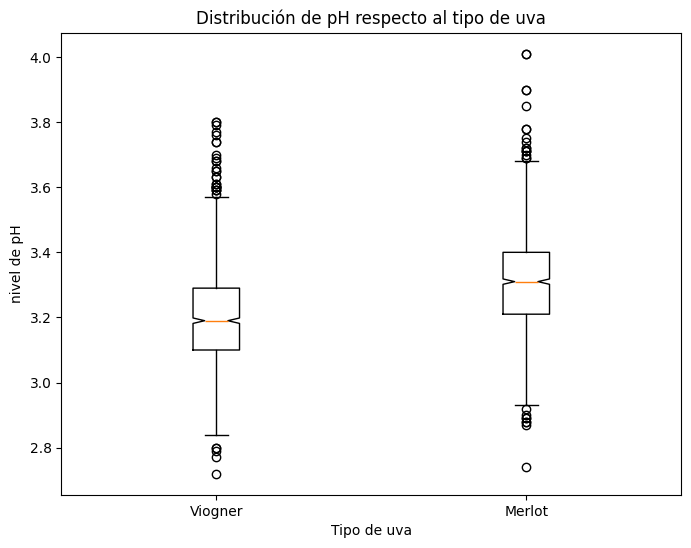

In [82]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["pH"],
             df_filtrado[df_filtrado["type"] == "Merlot"]["pH"]],
             labels=["Viogner", "Merlot"], notch=True)
# Agregar etiquetas a los ejes
plt.xlabel("Tipo de uva")
plt.ylabel("nivel de pH")

# Agregar un título al gráfico
plt.title("Distribución de pH respecto al tipo de uva")

# Mostrar el gráfico
plt.show()

Hipotesis: La densidad del vino es menor a mayor calidad
Como podemos realizar test de hipotesis de mas de dos muestras si sus distribuciones no son normales?
queriamos usar ANOVA pero no podemos
Kuskal Wallis???

In [83]:
from scipy.stats import shapiro

df_calidad3_vinos = df_filtrado[df_filtrado['quality'] == 3]['density']
df_calidad4_vinos = df_filtrado[df_filtrado['quality'] == 4]['density']
df_calidad5_vinos = df_filtrado[df_filtrado['quality'] == 5]['density']
df_calidad6_vinos = df_filtrado[df_filtrado['quality'] == 6]['density']
df_calidad7_vinos = df_filtrado[df_filtrado['quality'] == 7]['density']
df_calidad8_vinos = df_filtrado[df_filtrado['quality'] == 8]['density']
stat, p = shapiro(df_calidad3_vinos)
print(f"Test de Shapiro-Wilk para vinos de calidad 3: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = shapiro(df_calidad4_vinos)
print(f"Test de Shapiro-Wilk para vinos de calidad 4: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = shapiro(df_calidad5_vinos)
print(f"Test de Shapiro-Wilk para vinos de calidad 5: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = shapiro(df_calidad6_vinos)
print(f"Test de Shapiro-Wilk para vinos de calidad 6: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = shapiro(df_calidad7_vinos)
print(f"Test de Shapiro-Wilk para vinos de calidad 7: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = shapiro(df_calidad8_vinos)
print(f"Test de Shapiro-Wilk para vinos de calidad 8: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos de calidad 3: Estadístico=0.950, p-valor=0.529
Test de Shapiro-Wilk para vinos de calidad 4: Estadístico=0.968, p-valor=0.014
Test de Shapiro-Wilk para vinos de calidad 5: Estadístico=0.967, p-valor=0.000
Test de Shapiro-Wilk para vinos de calidad 6: Estadístico=0.974, p-valor=0.000
Test de Shapiro-Wilk para vinos de calidad 7: Estadístico=0.973, p-valor=0.000
Test de Shapiro-Wilk para vinos de calidad 8: Estadístico=0.948, p-valor=0.016


Como la distribucion de mis muestras no son todas normales, no puedo usar ANOVA, por eso aplicamos Kruskall-Wallis

In [84]:
stat, p = stats.kruskal(df_calidad3_vinos, df_calidad4_vinos, df_calidad5_vinos, df_calidad6_vinos, df_calidad7_vinos, df_calidad8_vinos)
print(f"Test de Kruskal-Wallis para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el azucar residual entre vinos merlot y viogner.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el azucar residual entre vinos merlot y viogner.")

Test de Kruskal-Wallis para GDP_per_capita: Estadístico=257.617, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el azucar residual entre vinos merlot y viogner.


Como haemos para saber si la diferencia entre muestras significa que crece la densidad mientras mayor calidad?

In [85]:
df_sulfuro_total_vinos_viogner = df_filtrado[df_filtrado['type'] == "Viogner"]['total sulfur dioxide']
stat, p = shapiro(df_sulfuro_total_vinos_viogner)
print(f"Test de Shapiro-Wilk para vinos viogner: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos viogner: Estadístico=0.990, p-valor=0.000


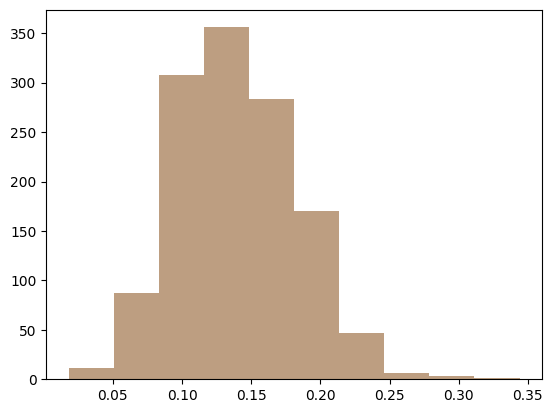

In [86]:
plt.hist(df_sulfuro_total_vinos_viogner, color="#bd9e81")
plt.show()

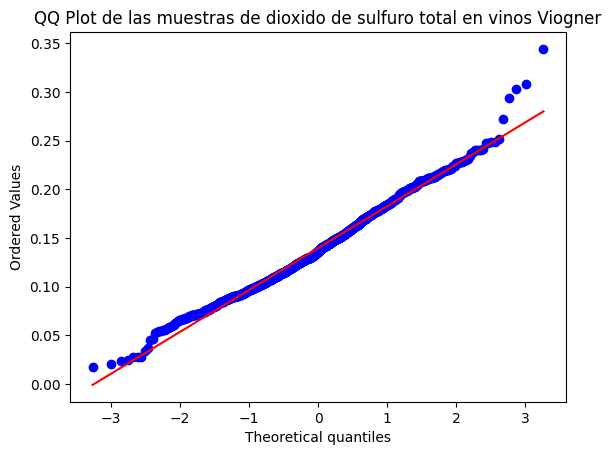

In [87]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# QQ plot para países desarrollados
stats.probplot(df_sulfuro_total_vinos_viogner, dist="norm", plot=plt)
plt.title("QQ Plot de las muestras de dioxido de sulfuro total en vinos Viogner")
plt.show()



In [88]:
from scipy.stats import kstest

# Test de Kolmogorov-Smirnov para países desarrollados
stat, p = kstest(df_sulfuro_total_vinos_viogner, 'norm')
print(f"Test de Kolmogorov-Smirnov para las muestras de dioxido de sulfuro total en vinos Viogner: Estadístico={stat:.3f}, p-valor={p:.3f}")


Test de Kolmogorov-Smirnov para las muestras de dioxido de sulfuro total en vinos Viogner: Estadístico=0.512, p-valor=0.000


?????????????????????????????????????????????????????????????

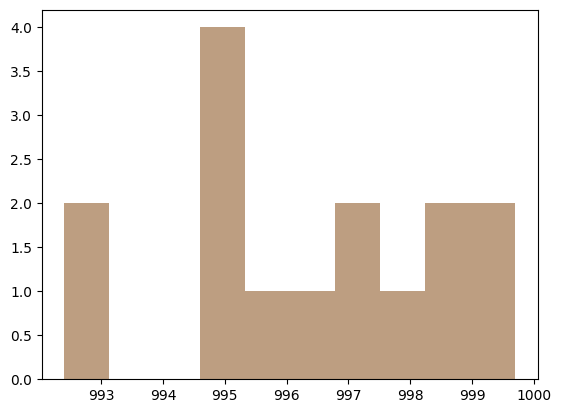

In [89]:
plt.hist(df_calidad3_vinos, color="#bd9e81")
plt.show()

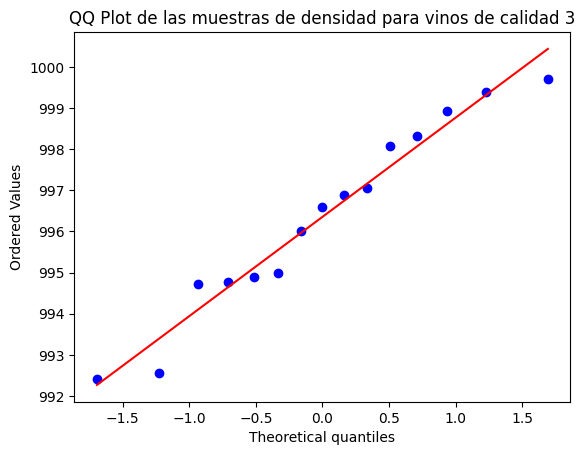

In [90]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# QQ plot para países desarrollados
stats.probplot(df_calidad3_vinos, dist="norm", plot=plt)
plt.title("QQ Plot de las muestras de densidad para vinos de calidad 3")
plt.show()



Hipotesis: a mayor calidad un vino tiene mayor cantidad de alcohol.

In [91]:
from scipy.stats import shapiro

df_calidad3_alcohol_vinos = df_filtrado[df_filtrado['quality'] == 3]['alcohol']
df_calidad4_alcohol_vinos = df_filtrado[df_filtrado['quality'] == 4]['alcohol']
df_calidad5_alcohol_vinos = df_filtrado[df_filtrado['quality'] == 5]['alcohol']
df_calidad6_alcohol_vinos = df_filtrado[df_filtrado['quality'] == 6]['alcohol']
df_calidad7_alcohol_vinos = df_filtrado[df_filtrado['quality'] == 7]['alcohol']
df_calidad8_alcohol_vinos = df_filtrado[df_filtrado['quality'] == 8]['alcohol']
stat, p = shapiro(df_calidad3_alcohol_vinos)
print(f"Test de Shapiro-Wilk para vinos de calidad 3: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = shapiro(df_calidad4_alcohol_vinos)
print(f"Test de Shapiro-Wilk para vinos de calidad 4: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = shapiro(df_calidad5_alcohol_vinos)
print(f"Test de Shapiro-Wilk para vinos de calidad 5: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = shapiro(df_calidad6_alcohol_vinos)
print(f"Test de Shapiro-Wilk para vinos de calidad 6: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = shapiro(df_calidad7_alcohol_vinos)
print(f"Test de Shapiro-Wilk para vinos de calidad 7: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = shapiro(df_calidad8_alcohol_vinos)
print(f"Test de Shapiro-Wilk para vinos de calidad 8: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos de calidad 3: Estadístico=0.909, p-valor=0.129
Test de Shapiro-Wilk para vinos de calidad 4: Estadístico=0.958, p-valor=0.002
Test de Shapiro-Wilk para vinos de calidad 5: Estadístico=0.893, p-valor=0.000
Test de Shapiro-Wilk para vinos de calidad 6: Estadístico=0.970, p-valor=0.000
Test de Shapiro-Wilk para vinos de calidad 7: Estadístico=0.990, p-valor=0.012
Test de Shapiro-Wilk para vinos de calidad 8: Estadístico=0.973, p-valor=0.234


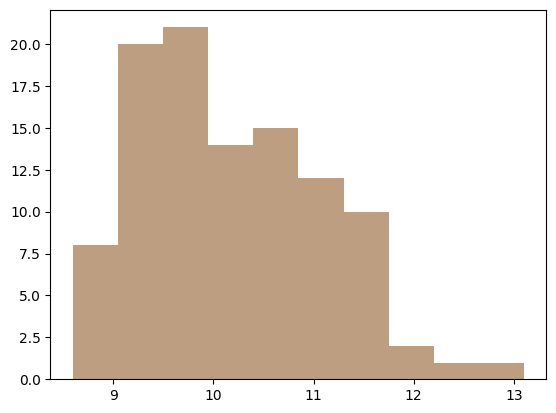

In [92]:
plt.hist(df_calidad4_alcohol_vinos, color="#bd9e81")
plt.show()

COMO QUE NO ES NORMAL

In [93]:
stat, p = stats.levene(df_calidad4_alcohol_vinos, df_calidad5_alcohol_vinos)
print(f"Test de Levene para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para GDP_per_capita: Estadístico=5.031, p-valor=0.025


In [94]:
from scipy.stats import median_test
res = median_test(df_calidad3_alcohol_vinos, df_calidad4_alcohol_vinos, df_calidad5_alcohol_vinos, df_calidad6_alcohol_vinos, df_calidad7_alcohol_vinos, df_calidad8_alcohol_vinos)
print(res)

MedianTestResult(statistic=np.float64(523.4287869106116), pvalue=np.float64(6.989965715757471e-111), median=np.float64(10.2), table=array([[  5,  43, 251, 613, 320,  53],
       [ 10,  61, 730, 444,  41,   4]]))


Se rechaza la hipótesis nula ya que el pe valor es menor al alpha = 0.05.
Existe una diferencia significativa en el alcohol entre los vinos de distinta calidad.

No responde a la hipotesis, a mayor calidad, mayor alcohol? Para responder esto vuelvo a realizar el test pero a una cola de a dos muestras para verificar si el alcohol es menor a mayor calidad.

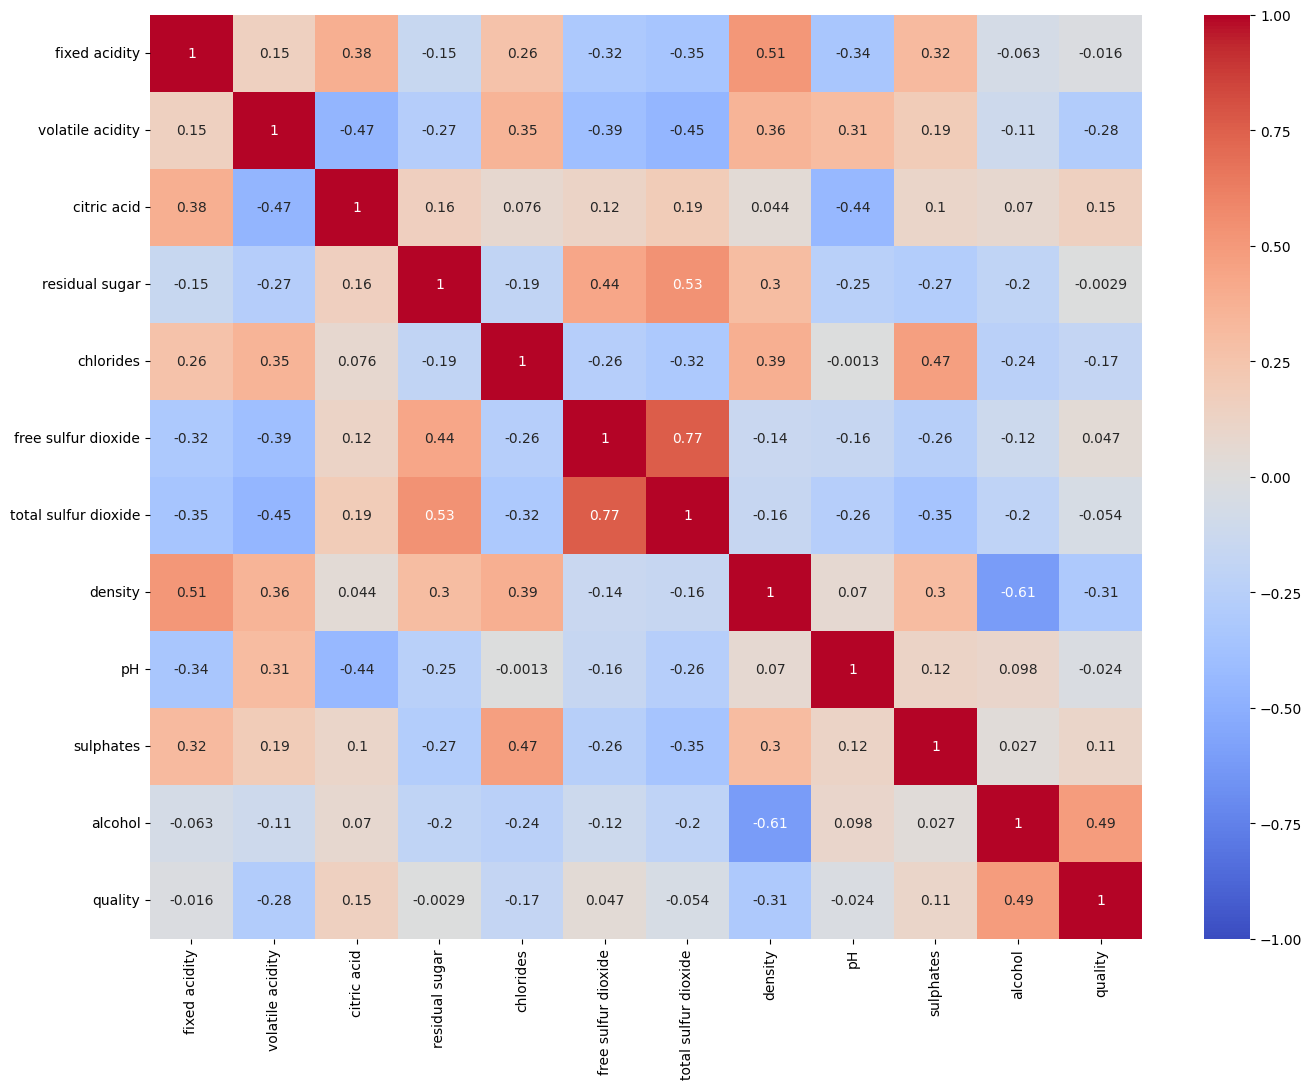

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_sin_strings = df_filtrado.copy()
df_sin_strings = df_sin_strings.drop(columns=['type'])
correlation_matrix = df_sin_strings.corr()
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

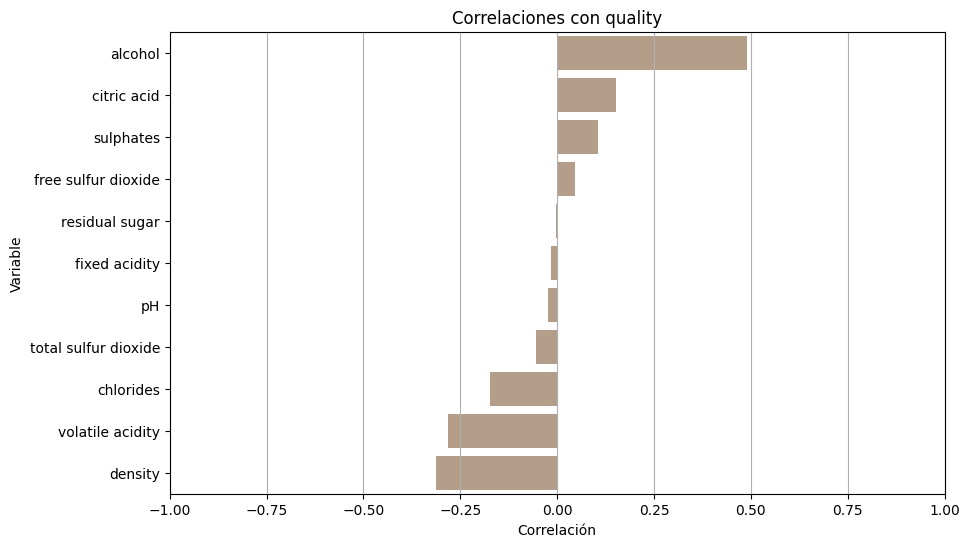

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecciona solo las correlaciones con quality
quality_correlations = correlation_matrix['quality'].drop('quality')

# Ordena las correlaciones de mayor a menor
sorted_correlations = quality_correlations.sort_values(ascending=False)

# Crea un gráfico de barras para visualizar las correlaciones
plt.figure(figsize=(10, 6))
plt.grid(True)
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, color="#bd9e81")
plt.title('Correlaciones con quality')
plt.xlabel('Correlación')
plt.ylabel('Variable')
plt.xlim([-1, 1])
plt.show()

Ajustamos un modelo de regresion multiple con la variable dependiente calidad, para ver que variables tienen mas peso a la hora de definir la calidad de un vino.

Primero estandarizamos los datos.

Stochastic Gradient Descent Classifier = ese es el metodo que utliza el chabon de kaggel para predecir, devuelve una variable de clase
el gradeinte ese


<Axes: >

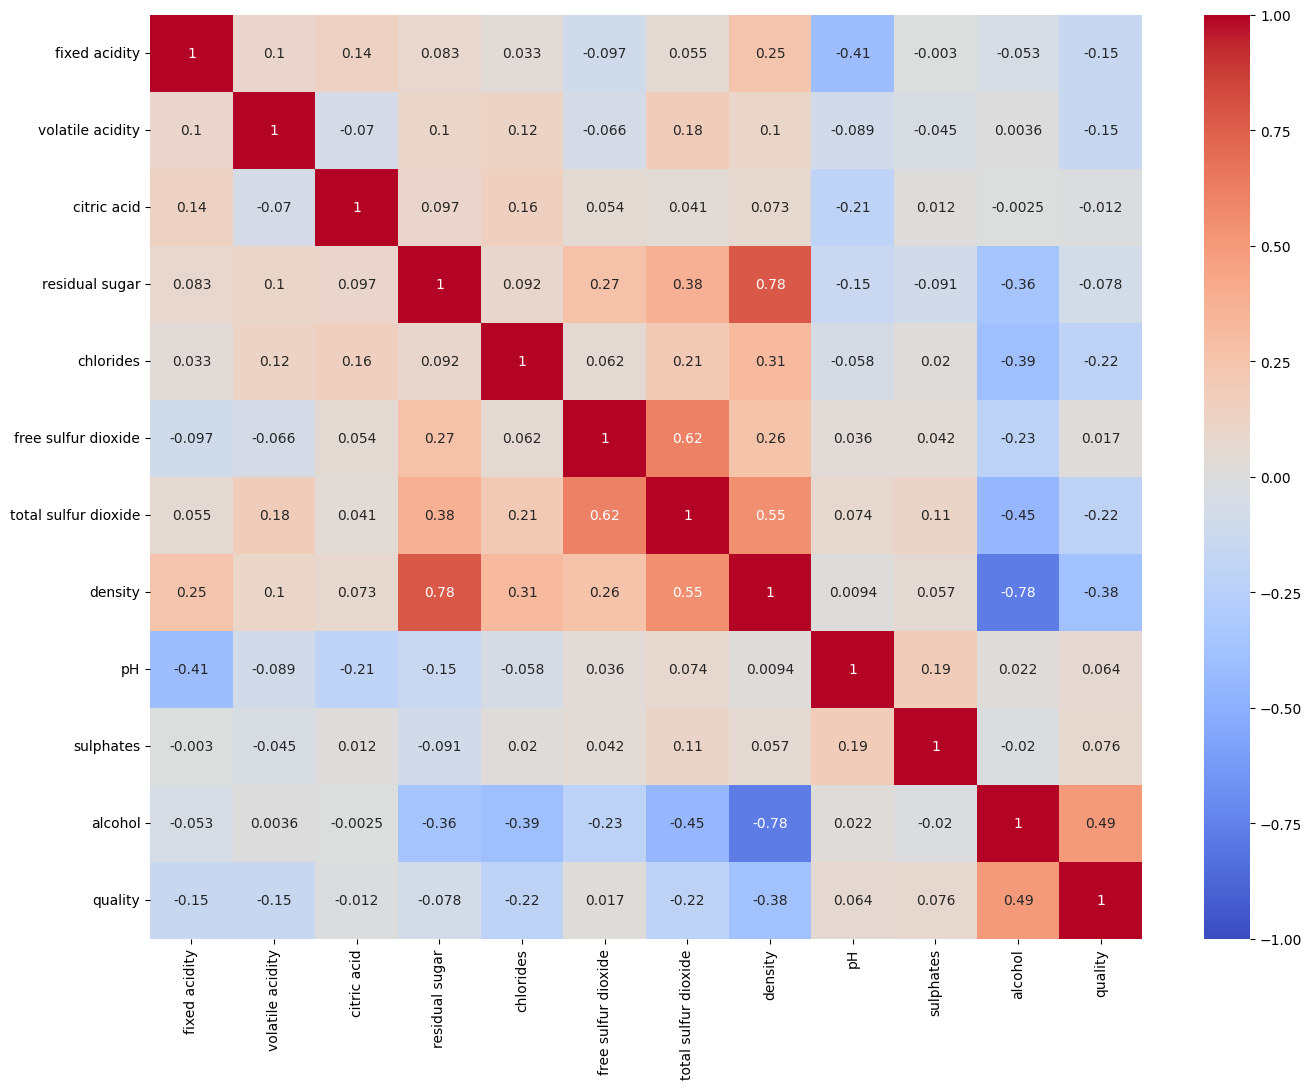

In [97]:
df_sin_strings = df_viogner.copy()
df_sin_strings = df_sin_strings.drop(columns=['type'])
correlation_matrix = df_sin_strings.corr()
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')

<Axes: >

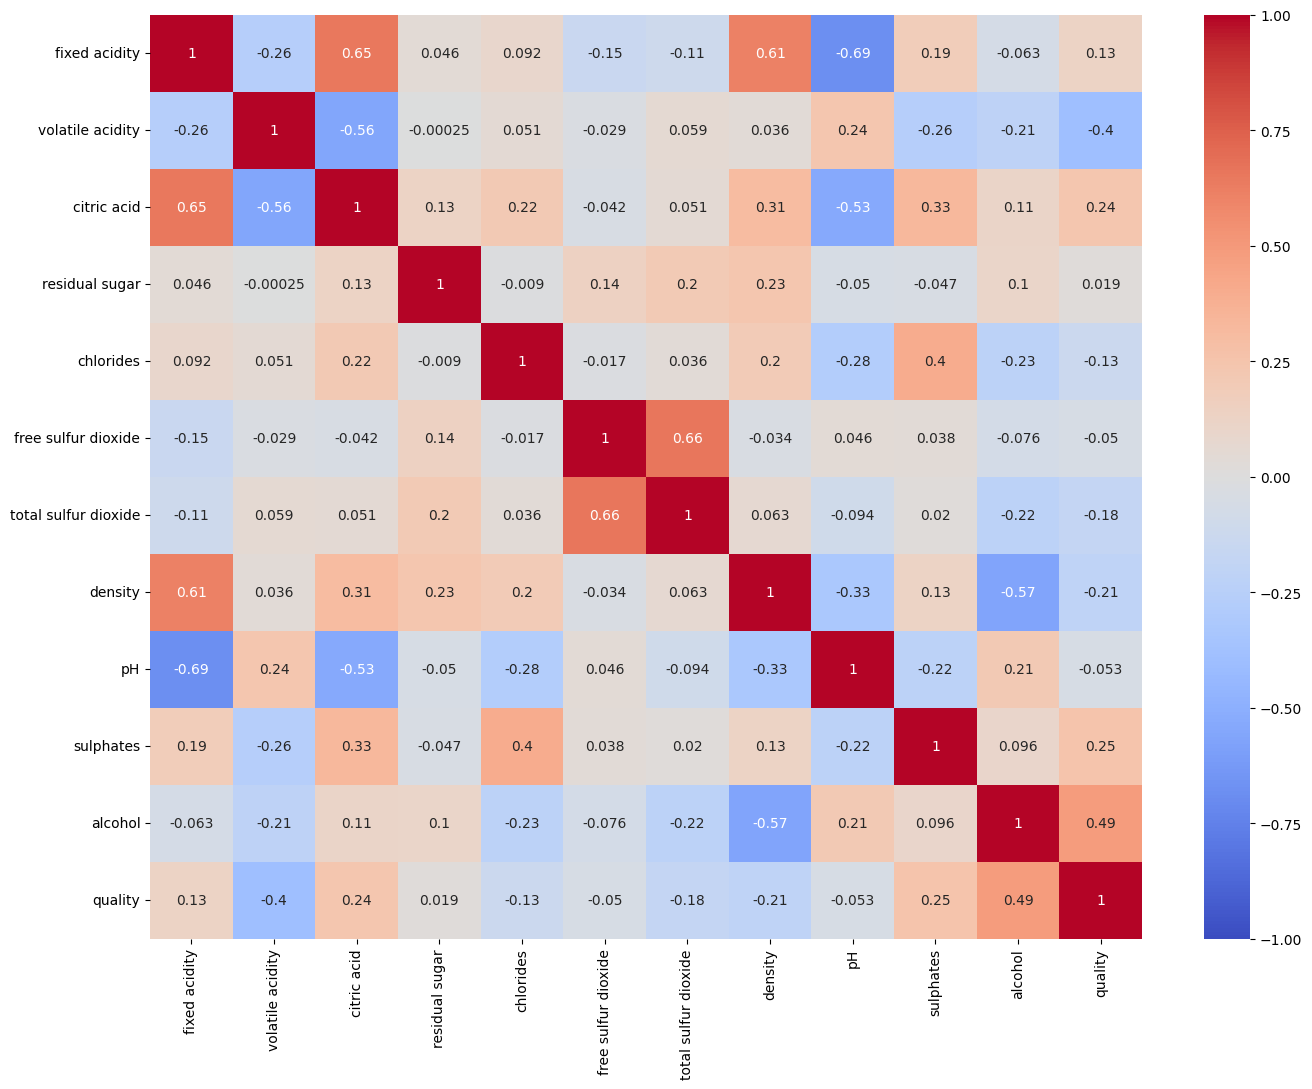

In [98]:
df_sin_strings = df_merlot.copy()
df_sin_strings = df_sin_strings.drop(columns=['type'])
correlation_matrix = df_sin_strings.corr()
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')

In [99]:
df_filtrado["quality"].value_counts()

quality
6    1057
5     981
7     361
4     104
8      57
3      15
Name: count, dtype: int64

In [100]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df_0_1 = df_filtrado.copy()
df_0_1['quality'] =df_0_1['quality'].map({3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1})

# Supongamos que tienes un DataFrame llamado df
X = df_0_1.drop(['type', 'quality'], axis=1)
y = df_0_1['quality']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Obtener los coeficientes
coeficientes = model.coef_[0]
# Crear un DataFrame para visualizar mejor los coeficientes

Accuracy: 0.7296248382923674
Confusion Matrix:
 [[226  92]
 [117 338]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.71      0.68       318
           1       0.79      0.74      0.76       455

    accuracy                           0.73       773
   macro avg       0.72      0.73      0.72       773
weighted avg       0.73      0.73      0.73       773



c:\Users\Tomas\Desktop\Tomi Ilari\Facu\Fund\practico2\Tp-ciencia-de-datos-\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [102]:
coef_df = pd.DataFrame(coeficientes, index=X.columns, columns=['Coeficiente'])
print(coef_df)

                      Coeficiente
fixed acidity            0.018200
volatile acidity        -2.244814
citric acid              0.663880
residual sugar           0.019234
chlorides               -0.117167
free sulfur dioxide      0.065719
total sulfur dioxide    -0.081753
density                 -0.010106
pH                       0.131106
sulphates                0.849891
alcohol                  0.957898


C:\Users\Tomas\AppData\Local\Temp\ipykernel_5624\25714681.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_filtrado[df_filtrado["quality"] == 3]["volatile acidity"],


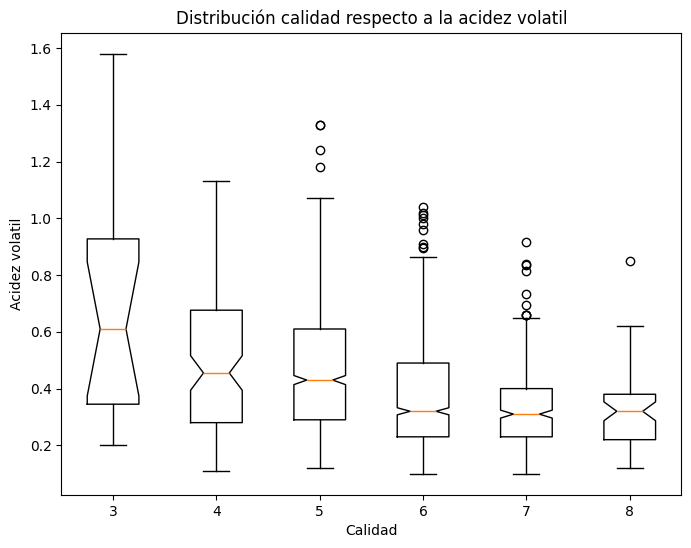

In [103]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df_filtrado[df_filtrado["quality"] == 3]["volatile acidity"],
             df_filtrado[df_filtrado["quality"] == 4]["volatile acidity"],
             df_filtrado[df_filtrado["quality"] == 5]["volatile acidity"],
             df_filtrado[df_filtrado["quality"] == 6]["volatile acidity"],
             df_filtrado[df_filtrado["quality"] == 7]["volatile acidity"],
             df_filtrado[df_filtrado["quality"] == 8]["volatile acidity"]],
             labels=["3", "4" ,"5", "6", "7", "8"], notch=True)
# Agregar etiquetas a los ejes
plt.xlabel("Calidad")
plt.ylabel("Acidez volatil")

# Agregar un título al gráfico
plt.title("Distribución calidad respecto a la acidez volatil")

# Mostrar el gráfico
plt.show()

In [104]:
df_filtrado

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Viogner,7.4,0.190,0.49,6.7,0.037,0.015,0.110,993.80,3.20,0.38,11.0,7
2,Viogner,7.5,0.140,0.74,1.6,0.035,0.021,0.126,993.30,3.26,0.45,10.2,6
3,Viogner,7.8,0.490,0.49,7.0,0.043,0.029,0.149,995.20,3.21,0.33,10.0,5
4,Viogner,8.1,0.120,0.49,1.2,0.042,0.043,0.160,993.40,3.13,0.48,9.7,6
5,Viogner,7.6,0.470,0.49,13.0,0.239,0.042,0.220,998.80,2.96,0.51,9.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,Merlot,6.8,0.620,0.08,1.9,0.068,0.028,0.038,996.51,3.42,0.82,9.5,6
3227,Merlot,6.2,0.600,0.08,2.0,0.090,0.032,0.044,994.90,3.45,0.58,10.5,5
3228,Merlot,5.9,0.550,0.10,2.2,0.062,0.039,0.051,995.12,3.52,0.76,11.2,6
3230,Merlot,5.9,0.645,0.12,2.0,0.075,0.032,0.044,995.47,3.57,0.71,10.2,5


In [ ]:

plt.bar(df_filtrado["quality"], df_filtrado["volatile acidity"], color="#bd9e81")

# Agregar etiquetas a los ejes
plt.xlabel("Calidad")
plt.ylabel("Acidez volatil")

# Agregar un título al gráfico
plt.title("Calidad por azúcar residual en vinos")

# Mostrar el gráfico
plt.show()

NameError: name 'plt' is not defined